# ECON 148 Final Project
### Summer 2023



## Economic Analysis and Machine Learning of Mean Household Income, Life Expectancy, and Gender

### Group Members: 
Alex Lee, Hao Ran Chen, Robert Chan, Saaketh Gunukula
Provide information about the role of each student in the project such as hours spent and/or percantage workload. 

Alex Lee: Scaling Data, PCA, Machine Learning, Presentation, Reproducibility ~8 hours
Robert Chan: Data Descriptions, EDA, Presentation, ~6 hours
Saaketh Gunukula: Machine Learning, Presentation, Data Descriptions ~8 hours
Hao Ran Chen: Project Background and Objective, Interpretation and Conclusions ~2 hours

In [1]:
!pip install plotnine==0.12.1
!pip install mizani==0.9.2
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/pyth

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import mizani
import plotnine
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import statsmodels.formula.api as smf


In [ ]:
from py_helper_functions import *


In [ ]:
pip install scikit-misc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 80.6 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Source Data - Opportunity Insights

In order to make the project consistent across teams, we are limiting the project to a specific set of datasets that are linked to economics journal articles.  

Browse and choose one of the datasets from Harvard Professor Raj Chetty's [Equality of Opportunity Project](http://www.equality-of-opportunity.org/data/). You will find them neatly presented (and mostly cleaned) together with the title of the corresponding research paper. 

You should start by reading the accompanying paper, and start your analysis by exploring some of the claims or analysis that you find in the paper (it is not your goal to fully replicate the analysis in the paper). You should then propose some new analysis that you can do with the dataset. 


## Project Background & Objective (5 points)
In this section you will describe relevant background for your project. You are expected to identify and read the journal article that the dataset is supporting. You should review any claims in the article that you pursue in your analysis.   It should give enough information that a non-expert can understand in detail the history and / or context of the system or setting you wish to study, the need for quantitative analysis, and, broadly, what impact a quantitative analyses could have on the system.

Also you will pose the central objective or objectives for your semester project.  Objectives should be extremely clear, well-defined and clearly cast as prediction or inference problems.  

Some examples of prediction questions (from a wide range of topics, not only economics!)
1. _"The purpose of this project is to measure the impacts of location on innovation by a predition model on innovation based on geographic indicators."_ or
2. _"The purpose of this project is to train and evaluate different models to predict inter-generational mobility based on characteristics of where a person group up."_ or
3. _"The purpose of this project is to build a classifier for universities where a student has a high chance of social mobility."_

You should reflect here on why it's important to answer these questions.  In most cases this will mean that you'll frame the answers to your questions as informing one or more economic decisions / questions. If you have done a good job of providing project background (in the cell above) then this reflection will be short and easy to write.


Data background:
The study titled "The Association Between Income and Life Expectancy in the United States, 2001-2014" by Raj Chetty, Michael Stepner, and Sarah Abraham, published in 2016, is an extensive research project that examines the relationship between income levels and life expectancy in the United States.
Background:
The relationship between financial security and health has long been of interest to academics, decision-makers, and the general public. People with higher incomes tend to live longer and have better health than those with lower incomes, according to common observation. However, there was little actual information on the scope and makeup of this association within the United States prior to this study. The development of effective policies to address the disparities in health outcomes across different income groups was hampered by this lack of detailed information.The United States, one of the richest countries in the world, devotes a sizable portion of its GDP to healthcare. Despite this, it has been noted that the nation's health outcomes across various socio-economic groups exhibit significant inequalities. The population's overall health and well-being must be improved by comprehending the causes of these disparities and devising solutions to them.
Objective:
This study's main goal was to provide a thorough analysis of the relationship between income and life expectancy in the US over a 13-year period, from 2001 to 2014. The goal of the study was to comprehend the relationships between life expectancy and income percentiles, how these relationships have changed over time, and whether or not these patterns differ geographically.
The researchers realized that quantitative analysis was necessary to find patterns and trends that might shed light on the intricate relationships between income and life expectancy. They aimed to provide solid evidence that policymakers could use to make decisions by utilizing cutting-edge statistical techniques and analyzing a sizable dataset.
Impact:
This kind of quantitative analysis has a significant social impact. Policymakers can create strategies to address income-related disparities in health outcomes by understanding the relationship between income and life expectancy. This can result in the creation of focused interventions that aid in lowering health disparities and improve the population's general well-being. Additionally, it can contribute to public discussions and debates on matters pertaining to social welfare, healthcare, and economic inequality.


## Data Description (5 points)
Here you will provide an initial description of your data sets, including:
1. The origins of your data.  What is the corresponding paper of your data?
2. The structure, granularity, scope of your data.  To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time).  At a minimum, use some basic methods (`.head`, `.loc`, and so on) to provide support for the descriptions. 
3. You should also describe which data fields you will use as your target variables (explained variables), and which you will use as features (explanatory variables).  

You will want to read the paper carefully and summarize in your own words how the Opportunity Insights team has constructed the datasets.  

The corresponding paper to the dataset that we have is "The Association Between Income and Life Expectancy in the United States, 2001-2014 Table 2" by Chetty, Stepner, Abraham, Lin, Scuderi, Turner, Bergeron, and Cutler. This dataset was constructed by comprising de-identified tax records, Social Security Administration mortality data, and other administrative records. These data values were then grouped by Income Percentile, Gender, etc. 

This is the link to the data set.  http://www.equality-of-opportunity.org/data/health/health_ineq_online_table_2.csv

This is the link to the corresponding paper. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4866586/

Below we are going to acquire the data and see what information that the dataset contains.

In [ ]:
# load in data and create workfile
df = pd.read_csv('health_ineq_online_table_2.csv')
df.head()

gnd  pctile  year   count    hh_inc    le_agg  le_raceadj  sd_le_agg  \
0   F       1  2001  398740  499.1094  79.68207    79.89346   0.392838   
1   F       1  2002  411159  541.3069  79.18359    79.41062   0.353981   
2   F       1  2003  420298  529.1391  79.36441    79.57217   0.364781   
3   F       1  2004  427728  499.2995  79.89841    80.09248   0.352019   
4   F       1  2005  433665  474.1454  80.28360    80.46593   0.334612   

   sd_le_raceadj  
0       0.385240  
1       0.346817  
2       0.359097  
3       0.347992  
4       0.330986

Here we see a few variables:

- gnd:  Gender

- pctile: Income Percentile of Household

- year: Year of the data acquired

- count: Number of data points for the gender and year

- hh_inc: Average Household Income for that year

- le_agg: Unadjusted Life Expectancy

- le_raceadj: Life Expectancy adjusted for race

- sd_le_agg & sd_le_raceadj: Standard Error for their respective life expectancy

In [ ]:
print(df.shape)
for i in df.columns:
    print("Variable: " + i)
    print(df[i].unique())
    print()

(2800, 9)
Variable: gnd
['F' 'M']

Variable: pctile
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Variable: year
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]

Variable: count
[398740 411159 420298 ... 442401 439032 422080]

Variable: hh_inc
[4.991094e+02 5.413069e+02 5.291391e+02 ... 1.828705e+06 1.809494e+06
 1.334157e+06]

Variable: le_agg
[79.68207 79.18359 79.36441 ... 88.12717 88.8239  89.699  ]

Variable: le_raceadj
[79.89346 79.41062 79.57217 ... 88.25696 88.93484 89.78313]

Variable: sd_le_agg
[0.3928378 0.3539808 0.3647805 ... 0.6321949 0.5763371 0.4854068]

Variable: sd_le_raceadj
[0.3852398 0.

Here we see the size of the dataset and all the different variables and how many unique values there are in each variable. We see that `gnd` is either Male or Female, that the dataset goes from the years 2001-2014, and that the dataset analyzes each income percentile. We will look into some of the other variables next.

In [ ]:
df.describe()

pctile         year          count        hh_inc       le_agg  \
count  2800.000000  2800.000000    2800.000000  2.800000e+03  2800.000000   
mean     50.500000  2007.500000  433773.845714  9.764774e+04    83.627406   
std      28.871226     4.031849   18872.974468  1.977964e+05     3.657129   
min       1.000000  2001.000000  387717.000000  1.375935e+02    67.862120   
25%      25.750000  2004.000000  421633.000000  3.083662e+04    81.774230   
50%      50.500000  2007.500000  436506.000000  6.119835e+04    84.143945   
75%      75.250000  2011.000000  445446.500000  1.048515e+05    86.313637   
max     100.000000  2014.000000  462127.000000  2.435930e+06    91.120700   

        le_raceadj    sd_le_agg  sd_le_raceadj  
count  2800.000000  2800.000000    2800.000000  
mean     83.672665     0.560205       0.550729  
std       3.600353     0.107541       0.106312  
min      68.343380     0.179007       0.185262  
25%      81.858478     0.494333       0.485487  
50%      84.189405     0.560017       0.550386  
75%      86.306168     0.624831       0.614215  
max      91.076480     0.998827       0.974649

Here we see information about the average Incomes, Life Expectancies (unadjusted and adjusted), and their Standard Errors. This shows the different quartiles that each of those datasets have. 

In [ ]:
print(df.iloc[0])
print()
print(df.iloc[int(len(df)/2)])

gnd                     F
pctile                  1
year                 2001
count              398740
hh_inc           499.1094
le_agg           79.68207
le_raceadj       79.89346
sd_le_agg        0.392838
sd_le_raceadj     0.38524
Name: 0, dtype: object

gnd                     M
pctile                  1
year                 2001
count              387717
hh_inc           428.6913
le_agg           72.87766
le_raceadj       73.35743
sd_le_agg        0.308299
sd_le_raceadj    0.306622
Name: 1400, dtype: object


In this project, our target variable is `hh_inc` (Mean Household Income). The features of this dataset are `gender`, `year`, `le_raceadj` (Race-Adjusted Life Expectancy), and `sd_le_raceadj` (Standard Error of Race-Adjusted Life Expectancy).

## Exploratory Data Analysis (30 points)

In this section, you will use data science methods to prepare data for estimations/predictions in modeling section. Keep in mind that EDA is where you uncover the patterns of associations in your data. Use EDA to understand the relationships among the variables, and PCA and feature engineering to have hands-on information about the most important features in advance. You are all set for modeling! 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gnd            2800 non-null   object 
 1   pctile         2800 non-null   int64  
 2   year           2800 non-null   int64  
 3   count          2800 non-null   int64  
 4   hh_inc         2800 non-null   float64
 5   le_agg         2800 non-null   float64
 6   le_raceadj     2800 non-null   float64
 7   sd_le_agg      2800 non-null   float64
 8   sd_le_raceadj  2800 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 197.0+ KB


In [ ]:
#Rename and reorder column names for easier read
df = df.rename(columns = {"gnd": "Gender", "pctile": "Income Percentile", 
"year": "Year", "count": "Percentile Count", "hh_inc" : "Mean Household Income", 
"le_raceadj": "Race-Adjusted Life Expectancy", "le_agg": "Unadjusted Life Expectancy",
"sd_le_raceadj": "Standard Error of Race-Adjusted Life Expectancy",
"sd_le_agg": "Standard Error of Unadjusted Life Expectancy"})

df = df[['Year', 'Gender', 'Income Percentile', 'Percentile Count',
       'Mean Household Income', 'Unadjusted Life Expectancy',
       'Race-Adjusted Life Expectancy',
       'Standard Error of Unadjusted Life Expectancy',
       'Standard Error of Race-Adjusted Life Expectancy']]
df.head()

Year Gender  Income Percentile  Percentile Count  Mean Household Income  \
0  2001      F                  1            398740               499.1094   
1  2002      F                  1            411159               541.3069   
2  2003      F                  1            420298               529.1391   
3  2004      F                  1            427728               499.2995   
4  2005      F                  1            433665               474.1454   

   Unadjusted Life Expectancy  Race-Adjusted Life Expectancy  \
0                    79.68207                       79.89346   
1                    79.18359                       79.41062   
2                    79.36441                       79.57217   
3                    79.89841                       80.09248   
4                    80.28360                       80.46593   

   Standard Error of Unadjusted Life Expectancy  \
0                                      0.392838   
1                                      0.353981   
2                                      0.364781   
3                                      0.352019   
4                                      0.334612   

   Standard Error of Race-Adjusted Life Expectancy  
0                                         0.385240  
1                                         0.346817  
2                                         0.359097  
3                                         0.347992  
4                                         0.330986

First we want to observe the relationship between the mean household income and the race-adjusted life expectancy. To do this we create a scatterplot with 'Race-Adjusted Life Expectancy' on the x axis and the 'Mean Household Income' on the y axis. We also want to see how this distribution differs by year and what the difference between the genders are, and so we use the hue feature for the gender and the subplot feature for the year. What we see is that with every year, males make more than females, and we see a general positive correlation between mean household income and race-adjusted life expectancy. 

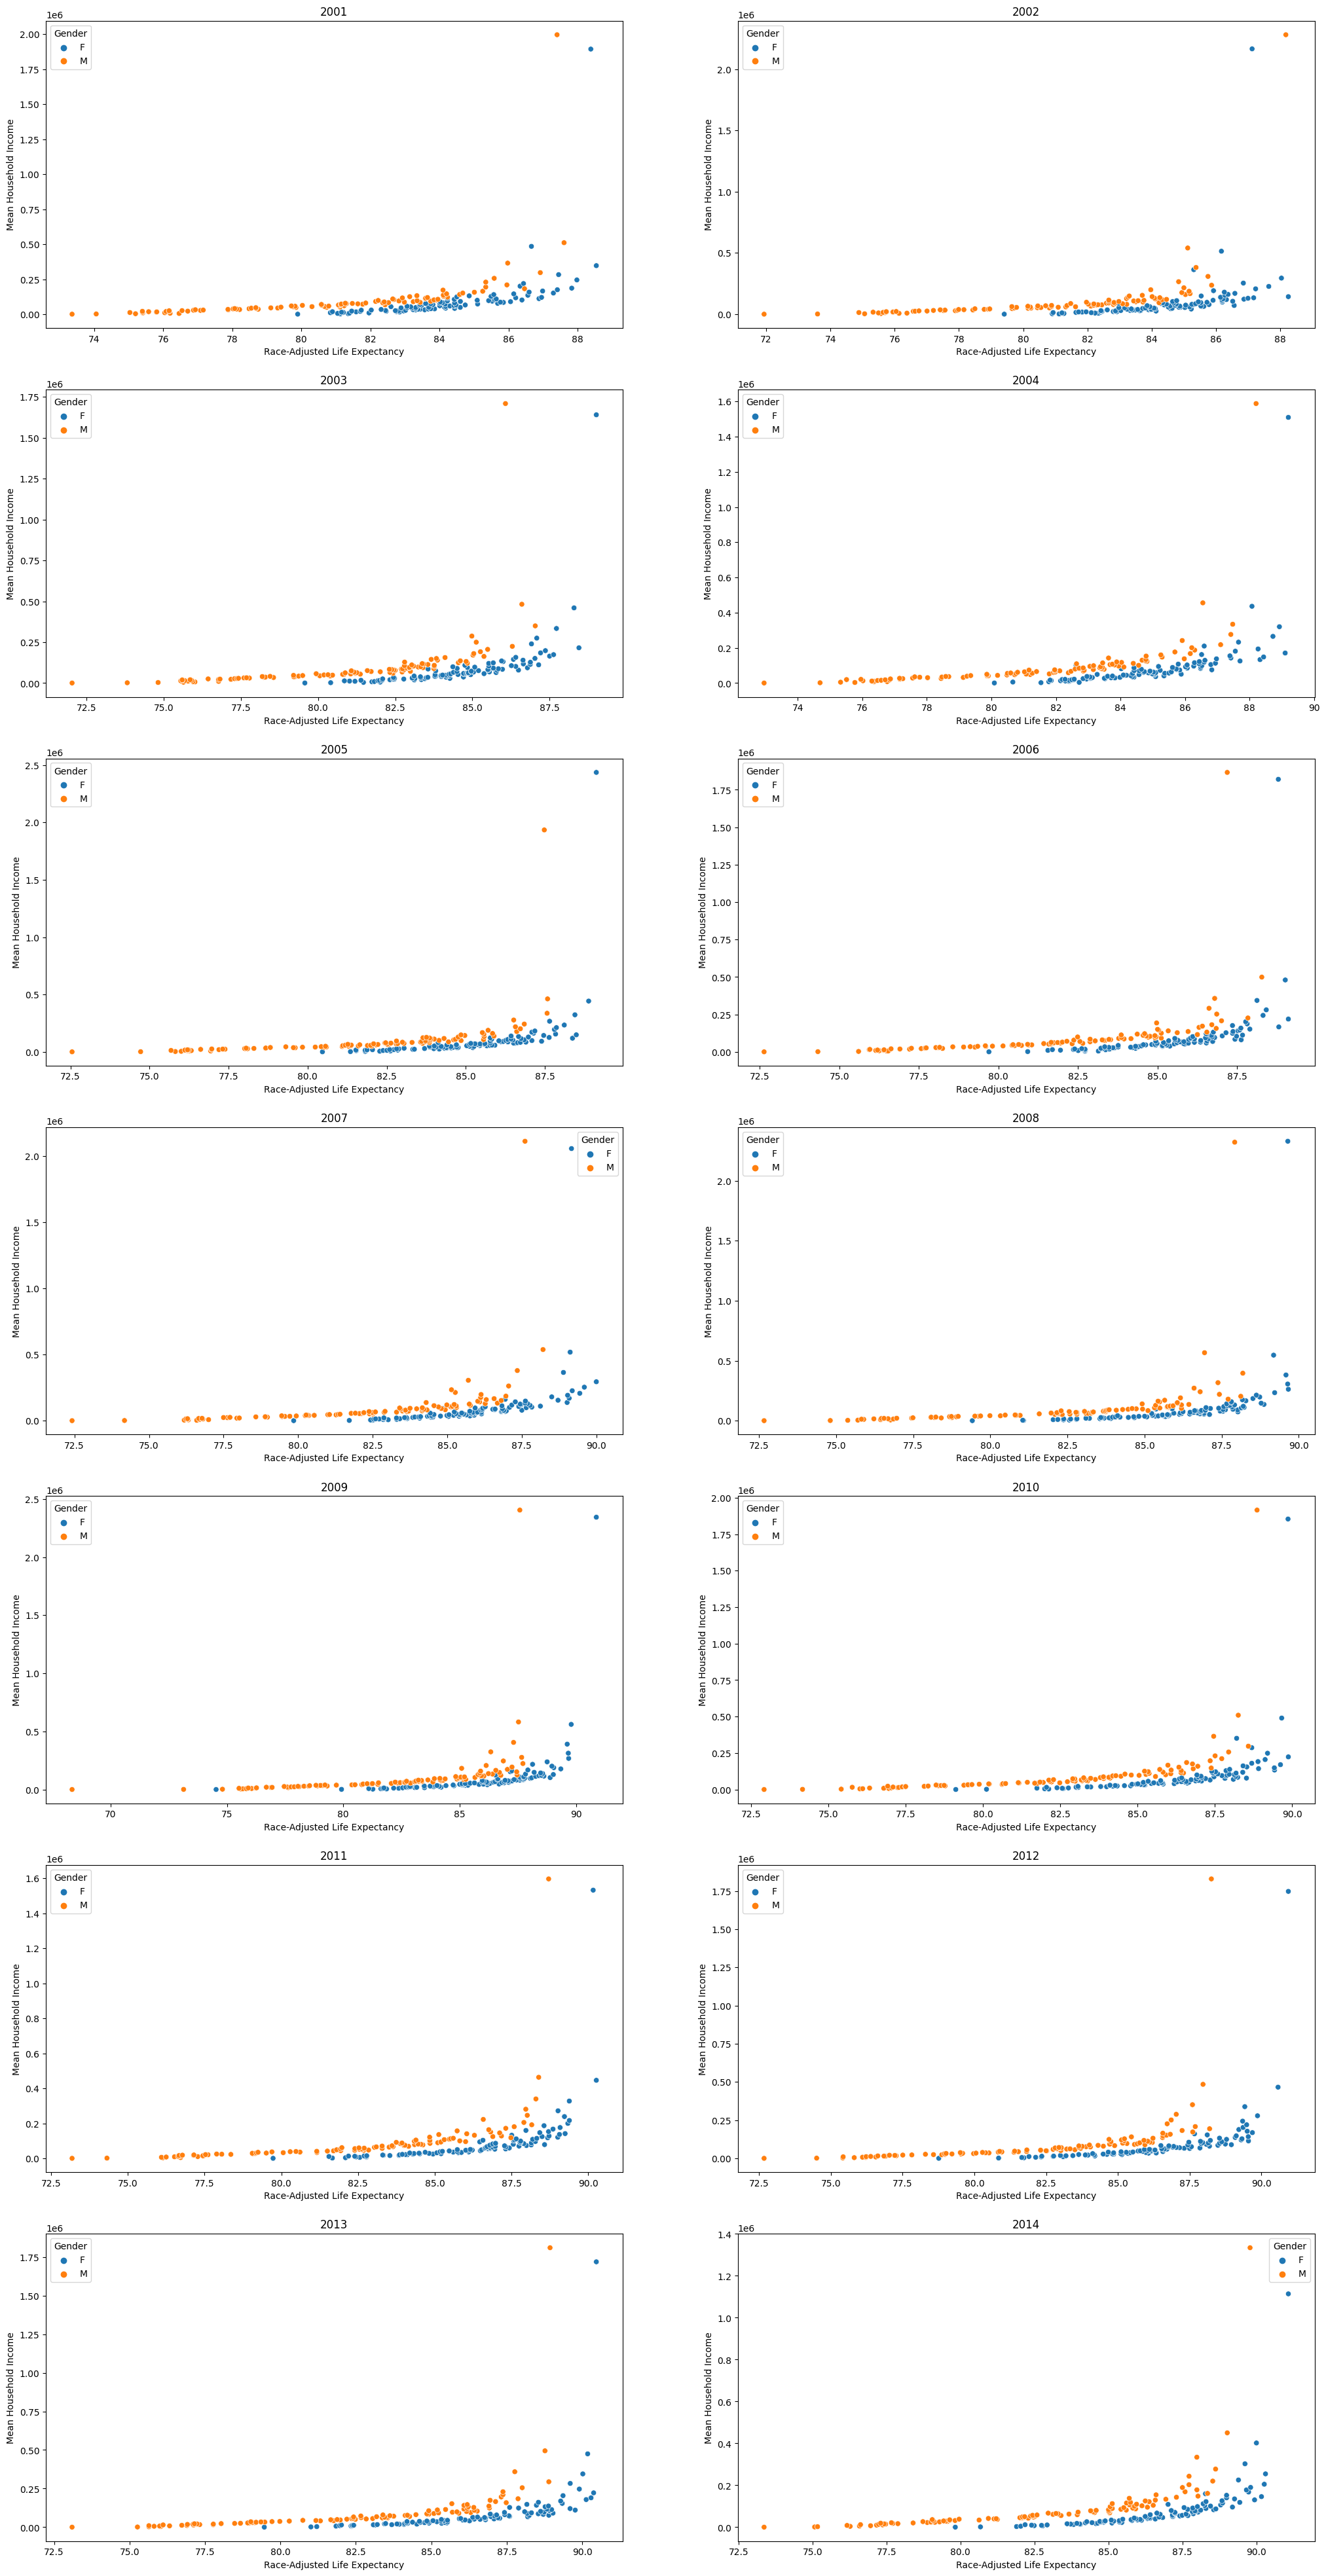

In [ ]:
#Observe relationship between Mean Household Income and Race-Adjusted Life Expectancy separated by Gender, from 2001-2014
plt.subplots(7, 2, figsize = (25, 50))
years = df["Year"].unique()

for i in np.arange(years.size):
    temp = df[df["Year"]==years[i]]
    plt.subplot(7, 2, i+1)
    plt.title(years[i])
    sns.scatterplot(data = temp, x = "Race-Adjusted Life Expectancy", y = "Mean Household Income", hue = "Gender")
    plt.xlabel("Race-Adjusted Life Expectancy")
    plt.ylabel("Mean Household Income")

Next, we want to see how the income changes by year, by having a scatterplot with the x-axis as the 'Year' and the y-axis as the 'Mean Household Income'. We also wanted to see how this changed based on the income percentile and see what the differences between the genders are. To do this we use the hue function for gender and the subplot function for income percentile. We can see as the percentiles go up, the data fluctuates more and more. We also see that from income percentile 11 onwards, the males make more than than females. From percentile 1 to 11, the females make more than the males.  

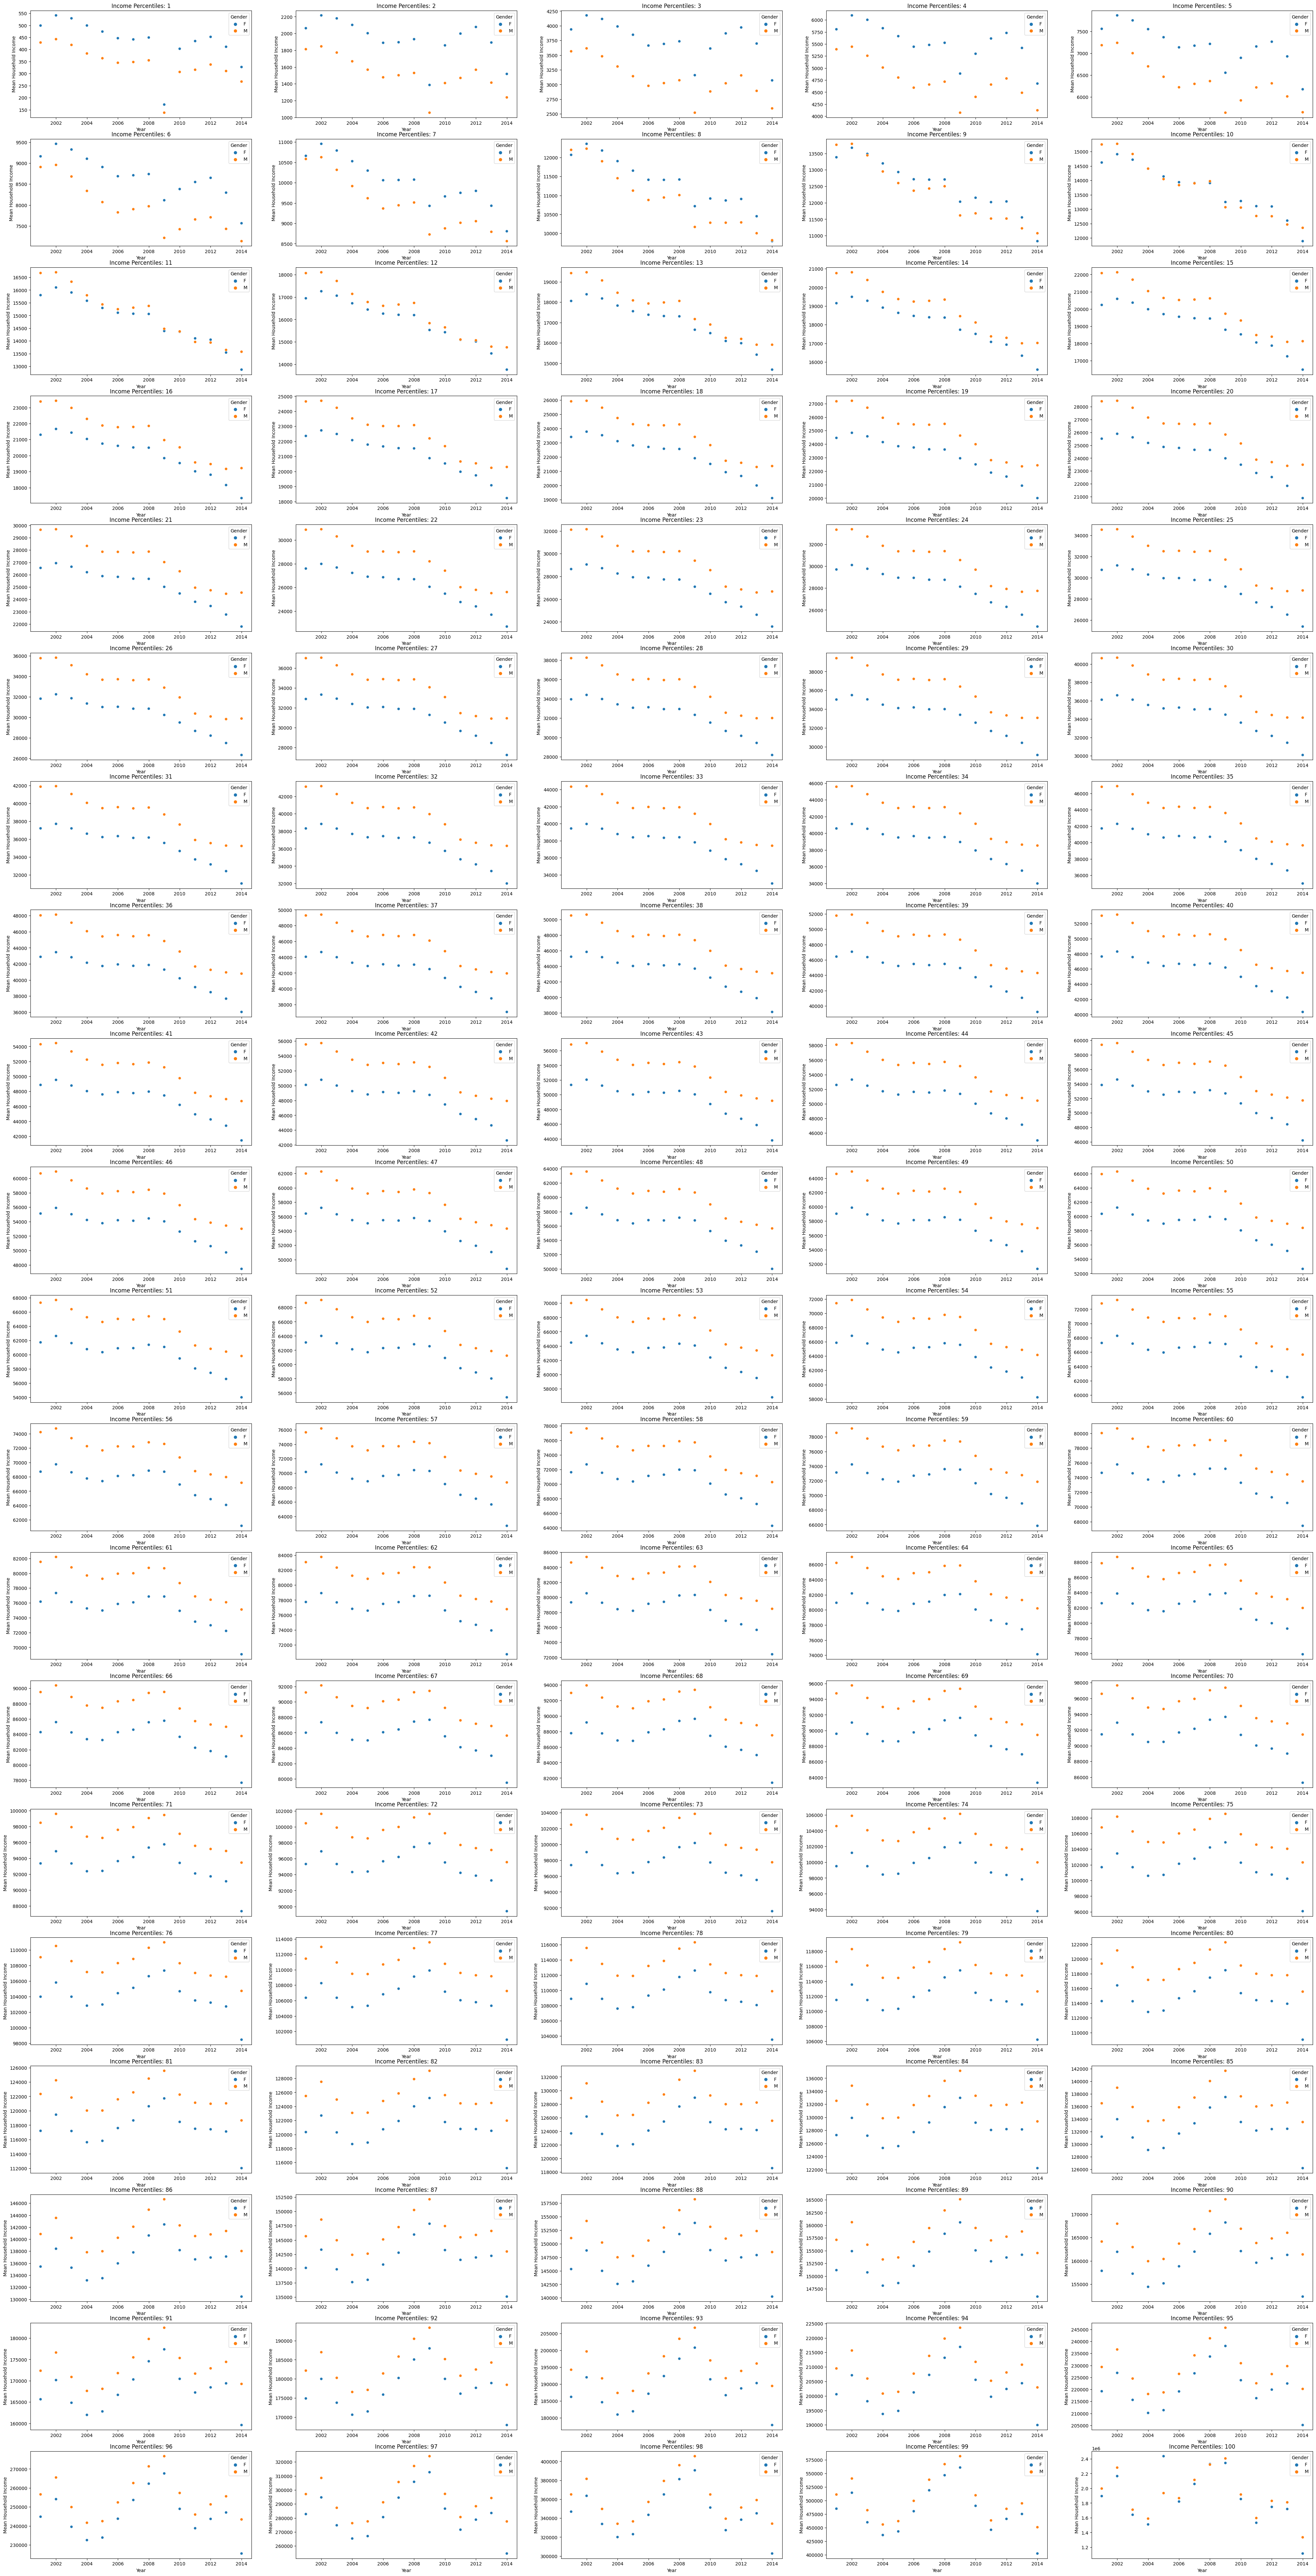

In [ ]:
#Observe relationship between Year and Mean Household Income separated by Gender, across Income Percentiles
plt.subplots(20, 5, figsize = (50, 100))
percentiles = df["Income Percentile"].unique()

for i in np.arange(percentiles.size):
    temp = df[df["Income Percentile"]==percentiles[i]]
    plt.subplot(20, 5, i+1)
    plt.title("Income Percentiles: " + str(percentiles[i]))
    sns.scatterplot(data = temp, x = "Year", y = "Mean Household Income", hue = "Gender")
    plt.xlabel("Year")
    plt.ylabel("Mean Household Income")

We want to also convert the gender to female and male by using pd.get_dummies.

In [ ]:
#Convert categorical variable (Gender) into dummy numerical variable (Female, Male)
df = pd.get_dummies(df)
df = df.rename({"Gender_F":"Female", "Gender_M": "Male"}, axis = 1)
df['Female'] = df['Female'].astype(float)
df['Male'] = df['Male'].astype(float)
df.head()

Year  Income Percentile  Percentile Count  Mean Household Income  \
0  2001                  1            398740               499.1094   
1  2002                  1            411159               541.3069   
2  2003                  1            420298               529.1391   
3  2004                  1            427728               499.2995   
4  2005                  1            433665               474.1454   

   Unadjusted Life Expectancy  Race-Adjusted Life Expectancy  \
0                    79.68207                       79.89346   
1                    79.18359                       79.41062   
2                    79.36441                       79.57217   
3                    79.89841                       80.09248   
4                    80.28360                       80.46593   

   Standard Error of Unadjusted Life Expectancy  \
0                                      0.392838   
1                                      0.353981   
2                                      0.364781   
3                                      0.352019   
4                                      0.334612   

   Standard Error of Race-Adjusted Life Expectancy  Female  Male  
0                                         0.385240     1.0   0.0  
1                                         0.346817     1.0   0.0  
2                                         0.359097     1.0   0.0  
3                                         0.347992     1.0   0.0  
4                                         0.330986     1.0   0.0

We also want to see the distribution with all the numerical variables. To do this, we take all the columns and use histograms and boxplots, plotting the distribution of each variable. Below we see the results, where 'Year,' 'Income Percentile,' 'Female,' and 'Male' have a uniform distribution. Both standard error variables, 'Standard Error of Unadjusted Life Expectancy' and 'Standard Error of Race-Adjusted Life Expectancy' have a normal distribution. The 'Percentile Count,' 'Unadjusted Life Expectancy,' and 'Race-Adjusted Life Expectancy' all have a left skewed distribution. Finally the 'Mean Household Income' is a right skewed distribution with a lot outliers. 

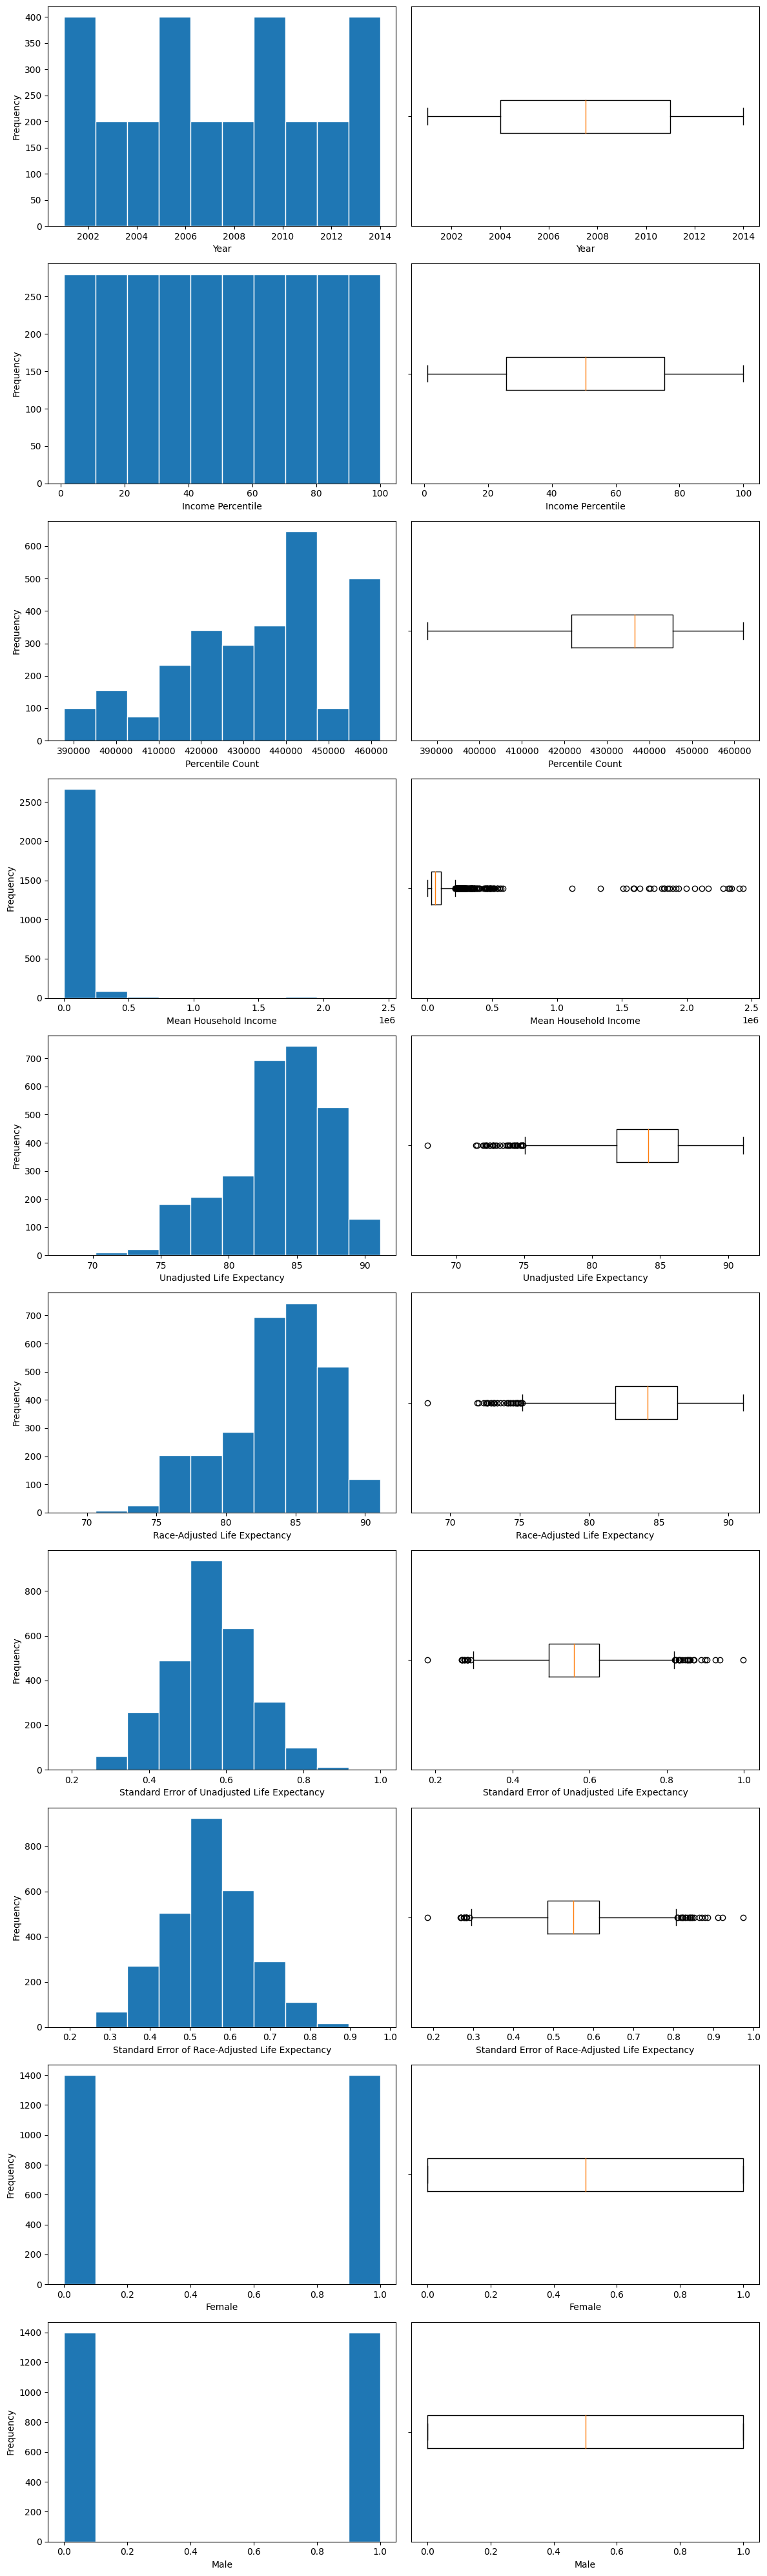

In [ ]:
# Define the numerical variables
numerical_vars = ['Year', 'Income Percentile', 'Percentile Count',
       'Mean Household Income', 'Unadjusted Life Expectancy',
       'Race-Adjusted Life Expectancy',
       'Standard Error of Unadjusted Life Expectancy',
       'Standard Error of Race-Adjusted Life Expectancy', 'Female', 'Male']

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram 
    axs[i, 0].hist(df[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


This is the same thing but the boxplots are vertical this time. Some notable things are that 'Mean Household Income' has a lot of outliers after its third quartile whereas 'Unadjusted Life Expectancy' and 'Race-Adjusted Life Expectancy' has outliers before its first quartile. 'Standard Error of Unadjusted Life Expectancy' and 'Standard Error of Race-Adjusted Life Expectancy' have outliers on both sides. 

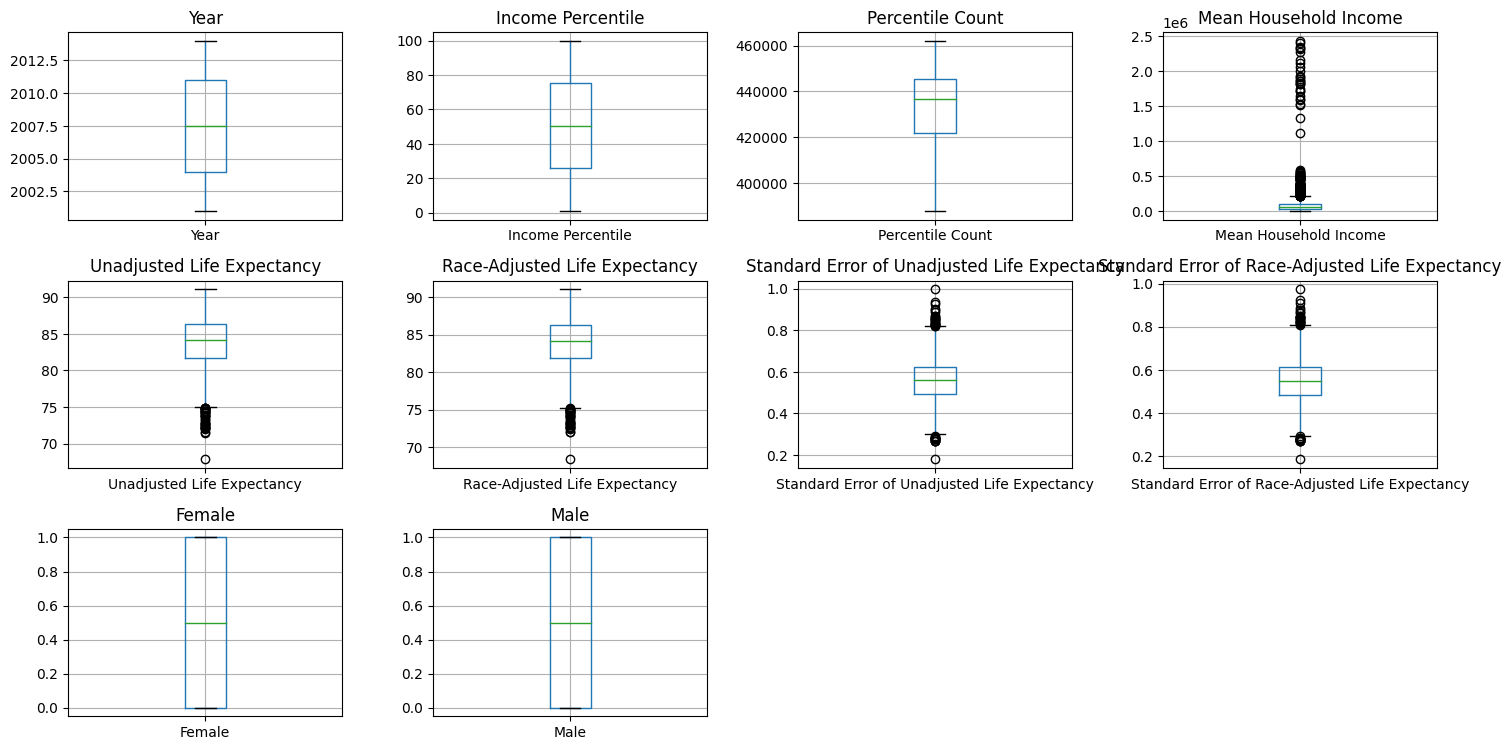

In [ ]:
# Define the numerical variables
numerical_vars = ['Year', 'Income Percentile', 'Percentile Count',
       'Mean Household Income', 'Unadjusted Life Expectancy',
       'Race-Adjusted Life Expectancy',
       'Standard Error of Unadjusted Life Expectancy',
       'Standard Error of Race-Adjusted Life Expectancy', 'Female', 'Male']

# Create subplots for box plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(4, 4, i+1)
    boxplot = df.boxplot(column=var)
    boxplot.set_title(var)
    boxplot.set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Here we apply scaling and winsorization to try to get rid of some of the outlier issues.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the numerical variables
numerical_vars = ['Year', 'Income Percentile', 'Percentile Count',
       'Mean Household Income', 'Unadjusted Life Expectancy',
       'Race-Adjusted Life Expectancy',
       'Standard Error of Unadjusted Life Expectancy',
       'Standard Error of Race-Adjusted Life Expectancy', 'Female', 'Male']

# Apply Winsorization to reduce outliers
winsorized_df = df.copy()
for var in numerical_vars:
    q_low = df[var].quantile(0.01)
    q_high = df[var].quantile(0.99)
    winsorized_df[var] = df[var].clip(q_low, q_high)

# Apply scaling to the winsorized DataFrame
scaler = MinMaxScaler()  # or StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(winsorized_df[numerical_vars]), columns=numerical_vars)

# Display the scaled DataFrame
scaled_df.head()

Year  Income Percentile  Percentile Count  Mean Household Income  \
0  0.000000                0.0          0.113419                    0.0   
1  0.076923                0.0          0.287903                    0.0   
2  0.153846                0.0          0.416303                    0.0   
3  0.230769                0.0          0.520692                    0.0   
4  0.307692                0.0          0.604106                    0.0   

   Unadjusted Life Expectancy  Race-Adjusted Life Expectancy  \
0                    0.339293                       0.341416   
1                    0.306660                       0.308944   
2                    0.318497                       0.319808   
3                    0.353455                       0.354800   
4                    0.378671                       0.379915   

   Standard Error of Unadjusted Life Expectancy  \
0                                      0.148454   
1                                      0.069153   
2                                      0.091193   
3                                      0.065148   
4                                      0.029623   

   Standard Error of Race-Adjusted Life Expectancy  Female  Male  
0                                         0.142081     1.0   0.0  
1                                         0.062862     1.0   0.0  
2                                         0.088180     1.0   0.0  
3                                         0.065283     1.0   0.0  
4                                         0.030220     1.0   0.0

Now that we plot histograms and box plots with this new scaled data frame and see what the differences were. Now, when looking at the new histograms and box plots, we see that there are less outliers and everything is less skewed than it was before.

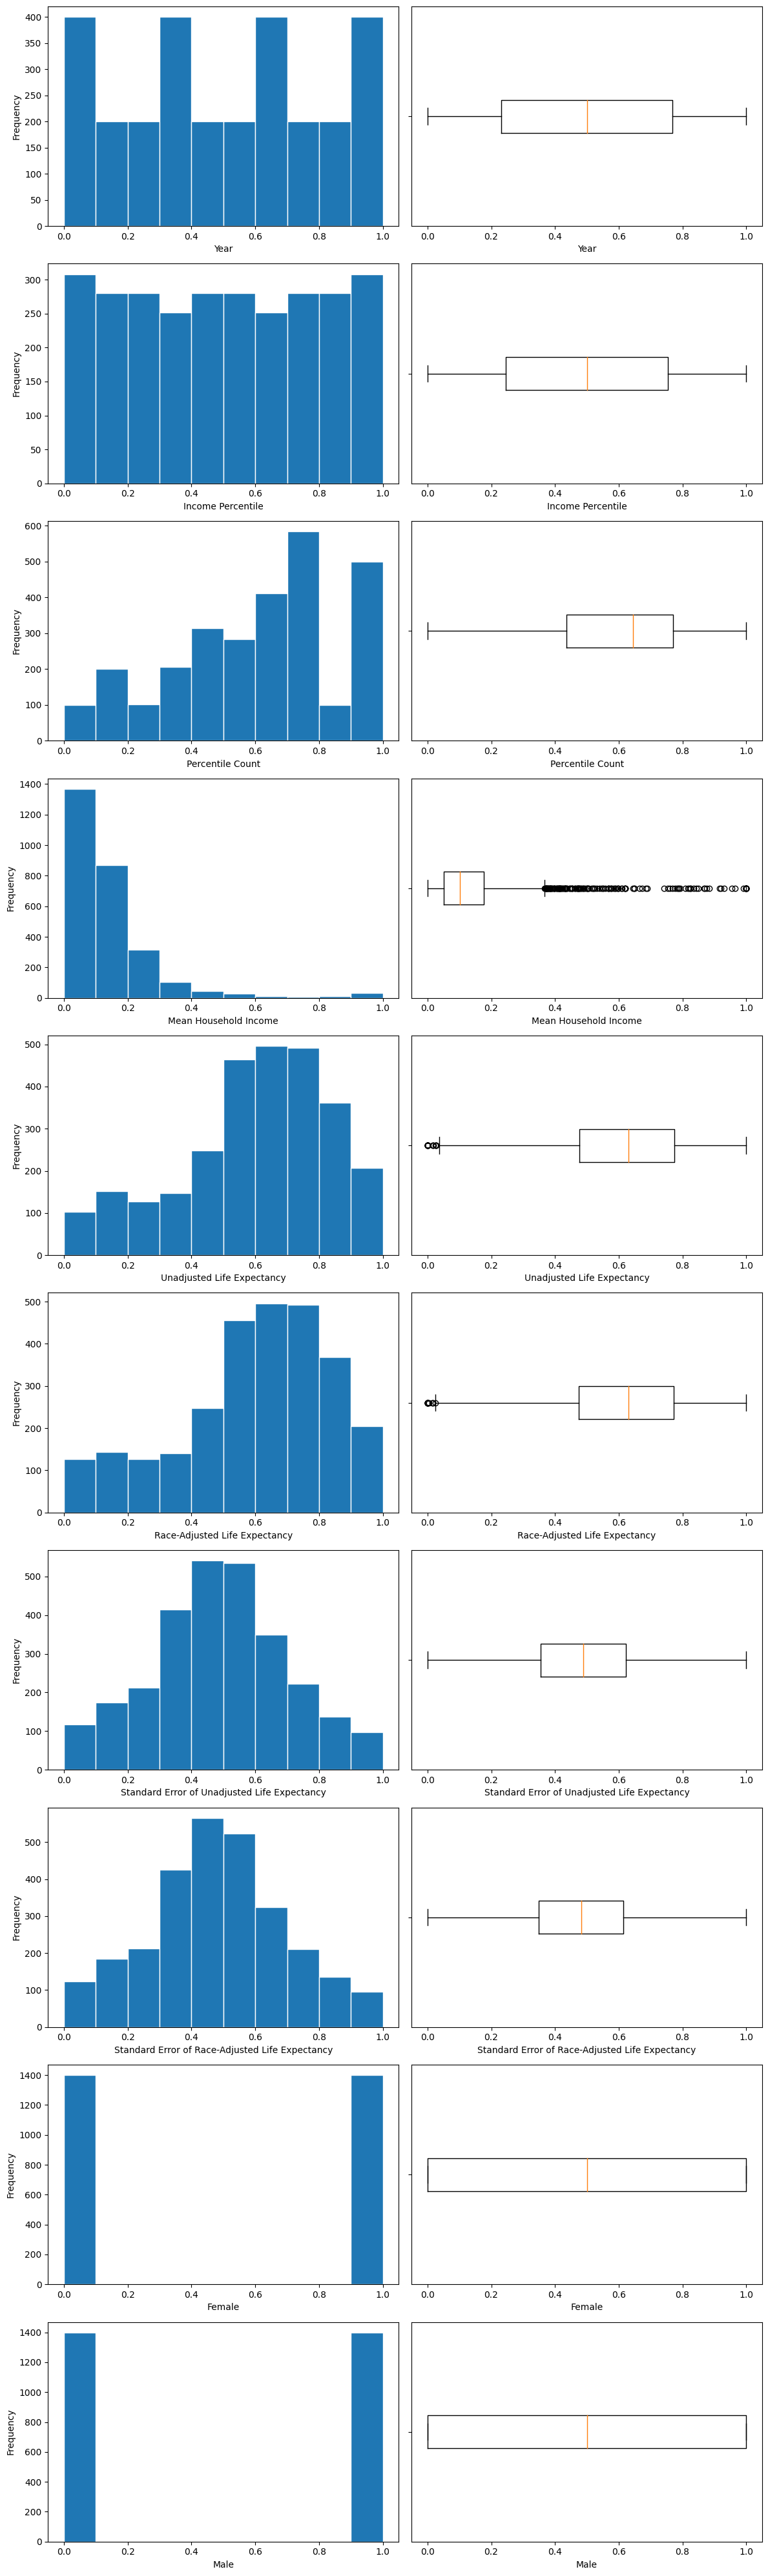

In [ ]:
# Define the numerical variables
numerical_vars = ['Year', 'Income Percentile', 'Percentile Count',
       'Mean Household Income', 'Unadjusted Life Expectancy',
       'Race-Adjusted Life Expectancy',
       'Standard Error of Unadjusted Life Expectancy',
       'Standard Error of Race-Adjusted Life Expectancy', 'Female', 'Male']

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram 
    axs[i, 0].hist(scaled_df[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(scaled_df[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Finally, we want to end this EDA with the use of a heatmap to plot out all the correlations between the different variables. Mainly, we want to see what the correlations between different variables and 'Mean Household Income' as we want to see variables with especially high correlations as it can cause overfitting. We see this especially with 'Income Percentile,' as 0.77 is a very high number and when looking at how 'Income Percentile; and 'Mean Household Income' are related, it makes sense why, as the percentile was probably made based on the income. We also want to note how it relates to 'Race-Adjust Life Expectancy,' having a 0.58 correlation which was very interesting to see. 

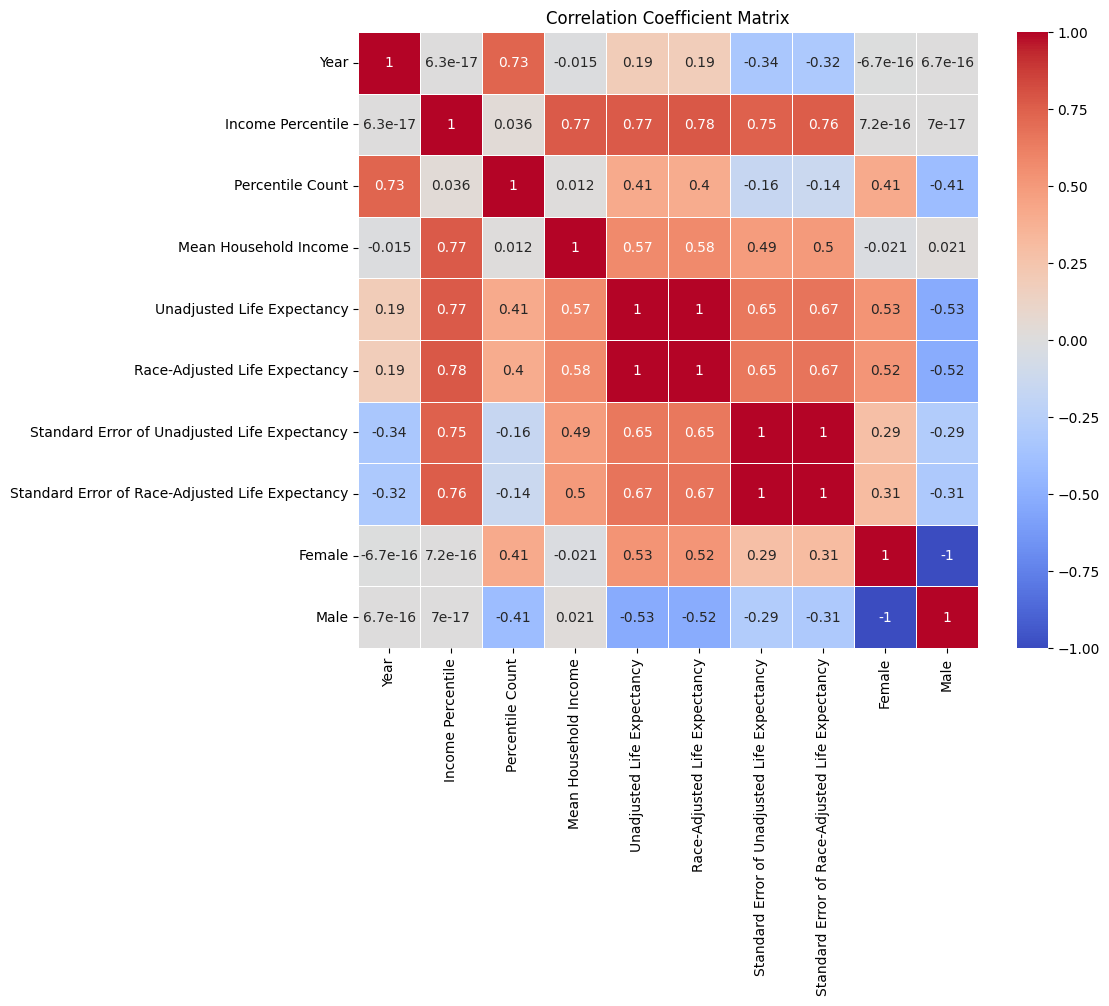

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

### PCA

The next step is to conduct PCA to find if there is any way to reduce dimensionality in the data. This first block of code shows the principal components, where each row is a principal components and each column is a feature or variable from the original dataset . It shows how the variables contribute to the principal component. The second thing this code shows is the explained variance ratios, which is the proportion of variance in the data explained by the principal component. 

In [ ]:
from sklearn.decomposition import PCA

# Drop Directly Correlated Variable
pca_scaled_df = scaled_df.drop(["Unadjusted Life Expectancy", "Standard Error of Unadjusted Life Expectancy", "Male"], axis = 1)

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(pca_scaled_df)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Principal Components:
[[-0.08308684 -0.13874763 -0.26453094 -0.0489177  -0.32253328 -0.17588797
  -0.8755066 ]
 [-0.33408529  0.64700651 -0.27271932  0.27037776  0.30905347  0.43037208
  -0.20385156]
 [-0.71219809 -0.31714521 -0.45321769 -0.13413938 -0.22954487  0.04577251
   0.33764948]
 [-0.57913952  0.0360141   0.68018065  0.29817228  0.00379544 -0.31530684
  -0.11097369]
 [ 0.14623008  0.00119087 -0.40938587  0.68706181  0.07114333 -0.55617265
   0.15676491]
 [ 0.1294436  -0.14148292  0.14089405  0.53611523 -0.60985062  0.53002366
   0.05579779]
 [ 0.02675825  0.66350187 -0.01215091 -0.24110031 -0.608912   -0.30344138
   0.1947351 ]]

Explained Variance Ratio:
[0.46816572 0.25402006 0.22176325 0.02240148 0.01900345 0.01039925
 0.0042468 ]


The next thing that we want to do is to produce a scree plot, which shows how adding principal components add to to explained variance ratio. It shows the diminishing returns of scree plot, and from that the reward to risk ratio is crossed after adding the third principal component, where it meets the 80% cutoff that we set. 

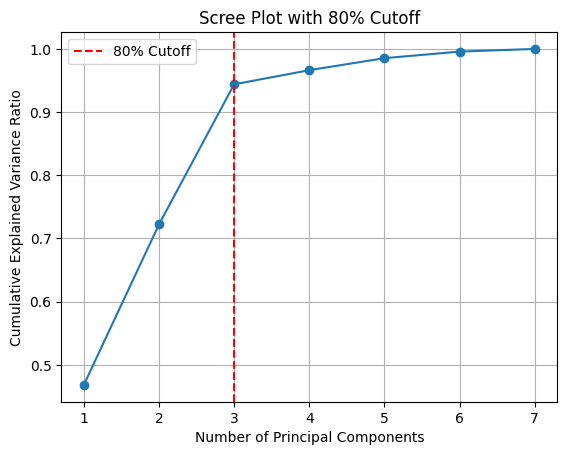

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(pca_scaled_df)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 80% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='80% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 80% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


This plot here is used to show whether the principal components are connected in anyway. We graph principal component 1 and principal component 2 and seeing if they intersect. From the graph below, we see that it doe snot and it effectively creates two clear clusters.  

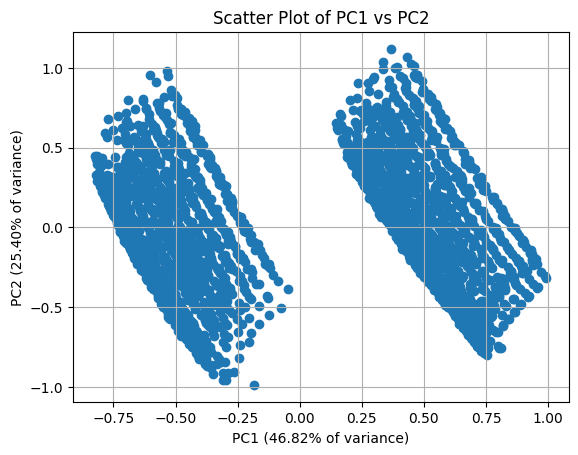

In [ ]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(pca_scaled_df)

# Create a scatter plot of PC1 and PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


Another step when doing principal component analysis is to create a loading plot, specifically between Principal Component 1 and Principal Component 2, and see the relationships between the original variables and the two principal components. By analyzing the weights of the original variables in the loading plot, we can see that Female contributed greatly to Principal Component 1 with a weight of -0.9. Additionally, Income Percentile notably contributed to Principal Component 2 with a weight of 0.6.

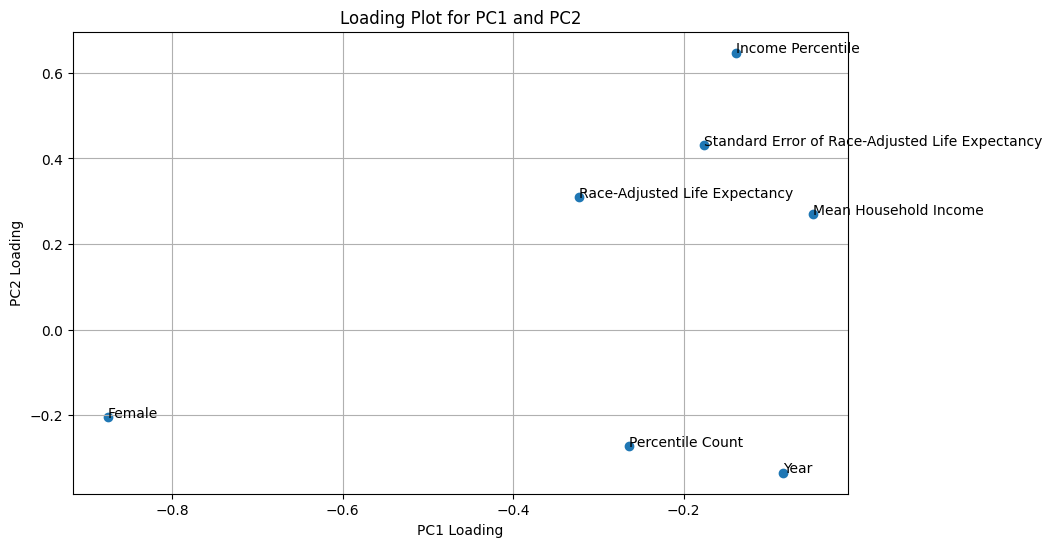

In [ ]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(pca_scaled_df)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(pca_scaled_df.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()


The final thing to do with out principal component analysis is to make a heat map of the correlation between the principal components to get further insights into their relationships. In general, we don't want principal components that are very highly positive or negatively correlated with one another, and would want them to be near 0 if possible. Principal components 1,3,4, and 5 all have multiple relationships where they are very strongly correlated with one another, making a combination of any of the principal components not feasible. This brings principal components 2 and 6, who are also highly correlated with one another and so these two cannot be in a combination with one another as well. The final problem is that we want at least the use of 3 principal components, but we cant do that with the way these correlations are looking, as any combination will lead to at least one pair of variables to be very correlated with one another. 

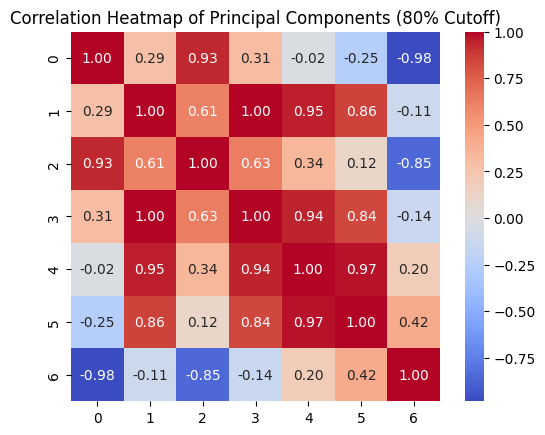

In [ ]:
import seaborn as sns
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(pca_scaled_df)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 80% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.80) + 1

# Get the principal components up to the cutoff index
principal_components_cutoff = pca.components_[:cutoff_index]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(principal_components_cutoff.T)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Principal Components (80% Cutoff)')
plt.show()


## Modeling (30 points)

In this section, you should use data science and machine learning techniques to improve econometric analysis in the papers you will pick, preferably. If you are unable to carry out econometric analysis, you will make predictions using the most appropriate ML algorithms. Start with baseline models, as we did during the lectures, and improve the models using the appropriate regularization methods, and pick the best prediction for unseen future data after model evaluation. Use some ML models only for feature importance, which also should be used as a linkage with econometric analysis. Again, follow the workflow in our in-class coding practices. 

### Econometric Analysis

In [ ]:
scaled_df.head()

Year  Income Percentile  Percentile Count  Mean Household Income  \
0  0.000000                0.0          0.113419                    0.0   
1  0.076923                0.0          0.287903                    0.0   
2  0.153846                0.0          0.416303                    0.0   
3  0.230769                0.0          0.520692                    0.0   
4  0.307692                0.0          0.604106                    0.0   

   Unadjusted Life Expectancy  Race-Adjusted Life Expectancy  \
0                    0.339293                       0.341416   
1                    0.306660                       0.308944   
2                    0.318497                       0.319808   
3                    0.353455                       0.354800   
4                    0.378671                       0.379915   

   Standard Error of Unadjusted Life Expectancy  \
0                                      0.148454   
1                                      0.069153   
2                                      0.091193   
3                                      0.065148   
4                                      0.029623   

   Standard Error of Race-Adjusted Life Expectancy  Female  Male  
0                                         0.142081     1.0   0.0  
1                                         0.062862     1.0   0.0  
2                                         0.088180     1.0   0.0  
3                                         0.065283     1.0   0.0  
4                                         0.030220     1.0   0.0

The first thing that we want to do is to look at a simple linear regression between 'Race-Adjust Life Expectancy' and 'Mean Household Income'. We do this by creating a scatterplot with all the points and then using the geom_smooth function and the method being a linear regression, we can get a regression plot

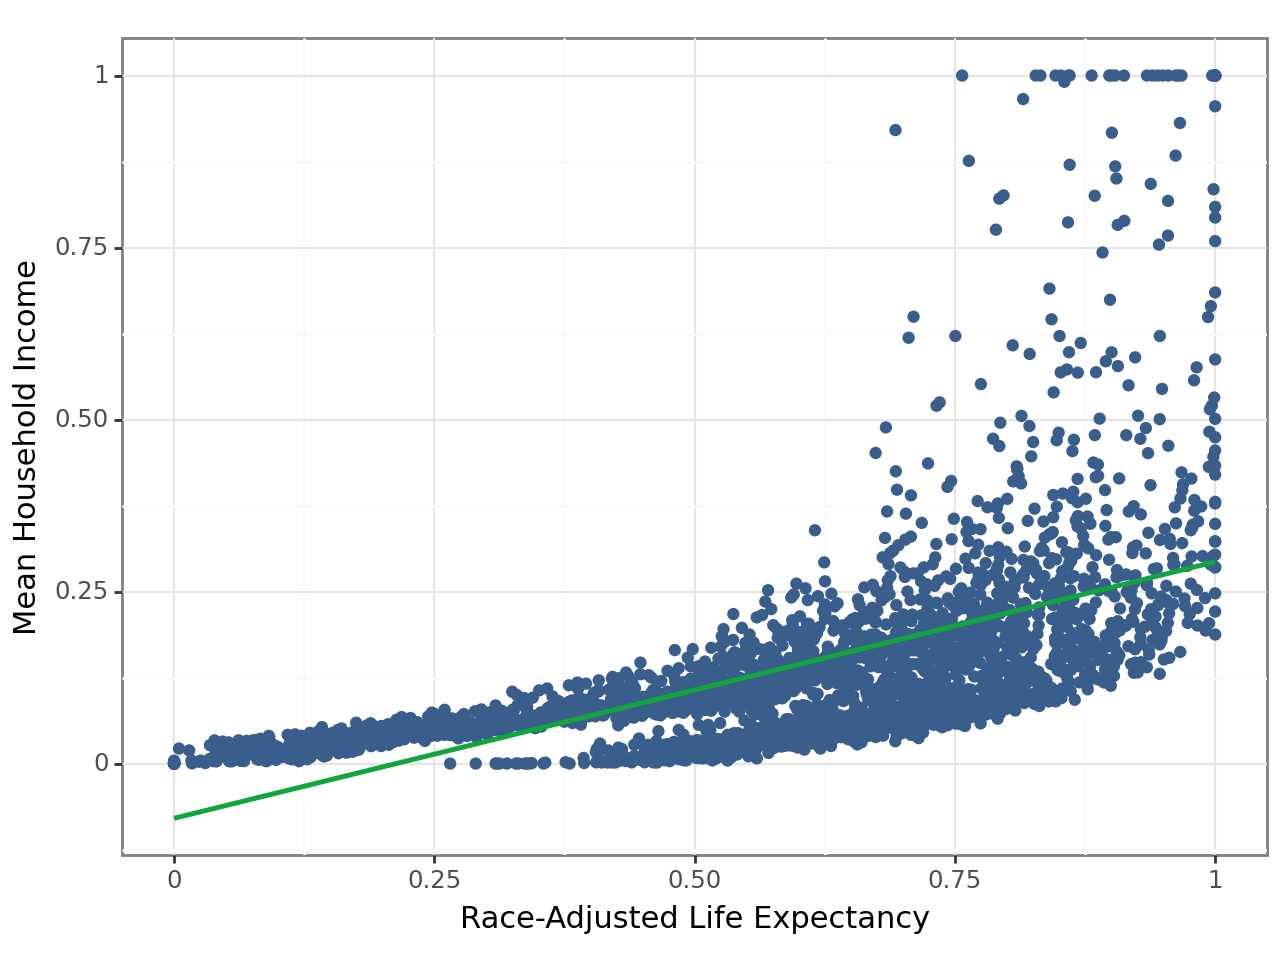

In [ ]:
p = (
    ggplot(scaled_df, aes(x="Race-Adjusted Life Expectancy", y="Mean Household Income"))
    + geom_point(color=color[0])
    + theme_bw()
)
p = p + geom_smooth(method="lm", color=color[1], se=False)
print(p)

We can clearly see from the scatter plot that Mean Household Income and Race-Adjusted Life Expectancy is not linearized. Since Mean Household Income will remain as our dependent variable, we will square Race-Adjusted Life Expectancy in hopes that the linear regression line will be a better fit.

In [ ]:
scaled_df['sqlife'] = np.square(scaled_df['Race-Adjusted Life Expectancy'])
scaled_df.head()

Year  Income Percentile  Percentile Count  Mean Household Income  \
0  0.000000                0.0          0.113419                    0.0   
1  0.076923                0.0          0.287903                    0.0   
2  0.153846                0.0          0.416303                    0.0   
3  0.230769                0.0          0.520692                    0.0   
4  0.307692                0.0          0.604106                    0.0   

   Unadjusted Life Expectancy  Race-Adjusted Life Expectancy  \
0                    0.339293                       0.341416   
1                    0.306660                       0.308944   
2                    0.318497                       0.319808   
3                    0.353455                       0.354800   
4                    0.378671                       0.379915   

   Standard Error of Unadjusted Life Expectancy  \
0                                      0.148454   
1                                      0.069153   
2                                      0.091193   
3                                      0.065148   
4                                      0.029623   

   Standard Error of Race-Adjusted Life Expectancy  Female  Male    sqlife  
0                                         0.142081     1.0   0.0  0.116565  
1                                         0.062862     1.0   0.0  0.095446  
2                                         0.088180     1.0   0.0  0.102277  
3                                         0.065283     1.0   0.0  0.125883  
4                                         0.030220     1.0   0.0  0.144335

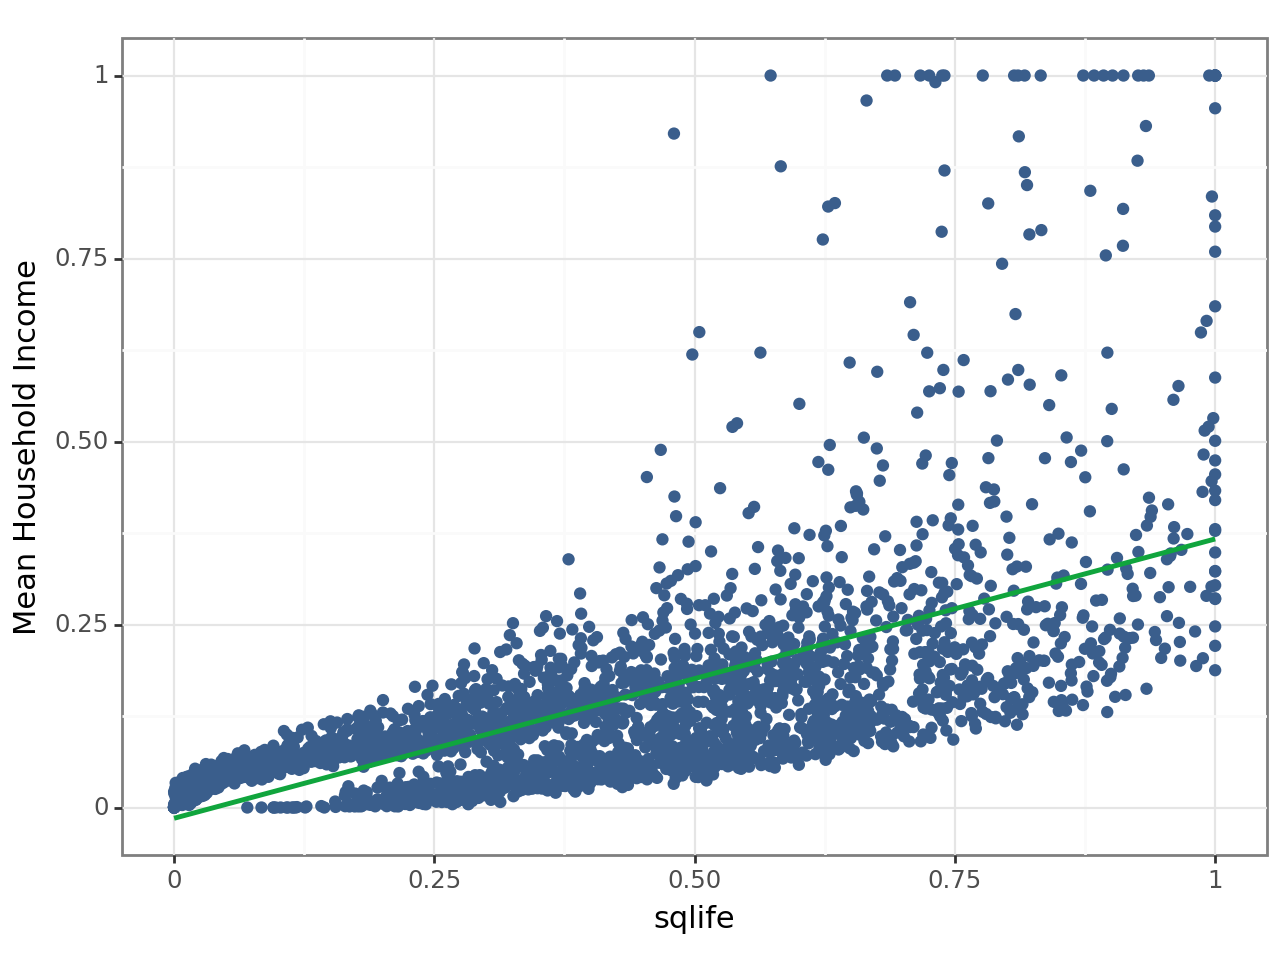

In [ ]:
p1 = (
    ggplot(scaled_df, aes(x="sqlife", y="Mean Household Income"))
    + geom_point(color=color[0])
    + theme_bw()
)
p2 = p1 + geom_smooth(method="lm", color=color[1], se=False)
print(p2)


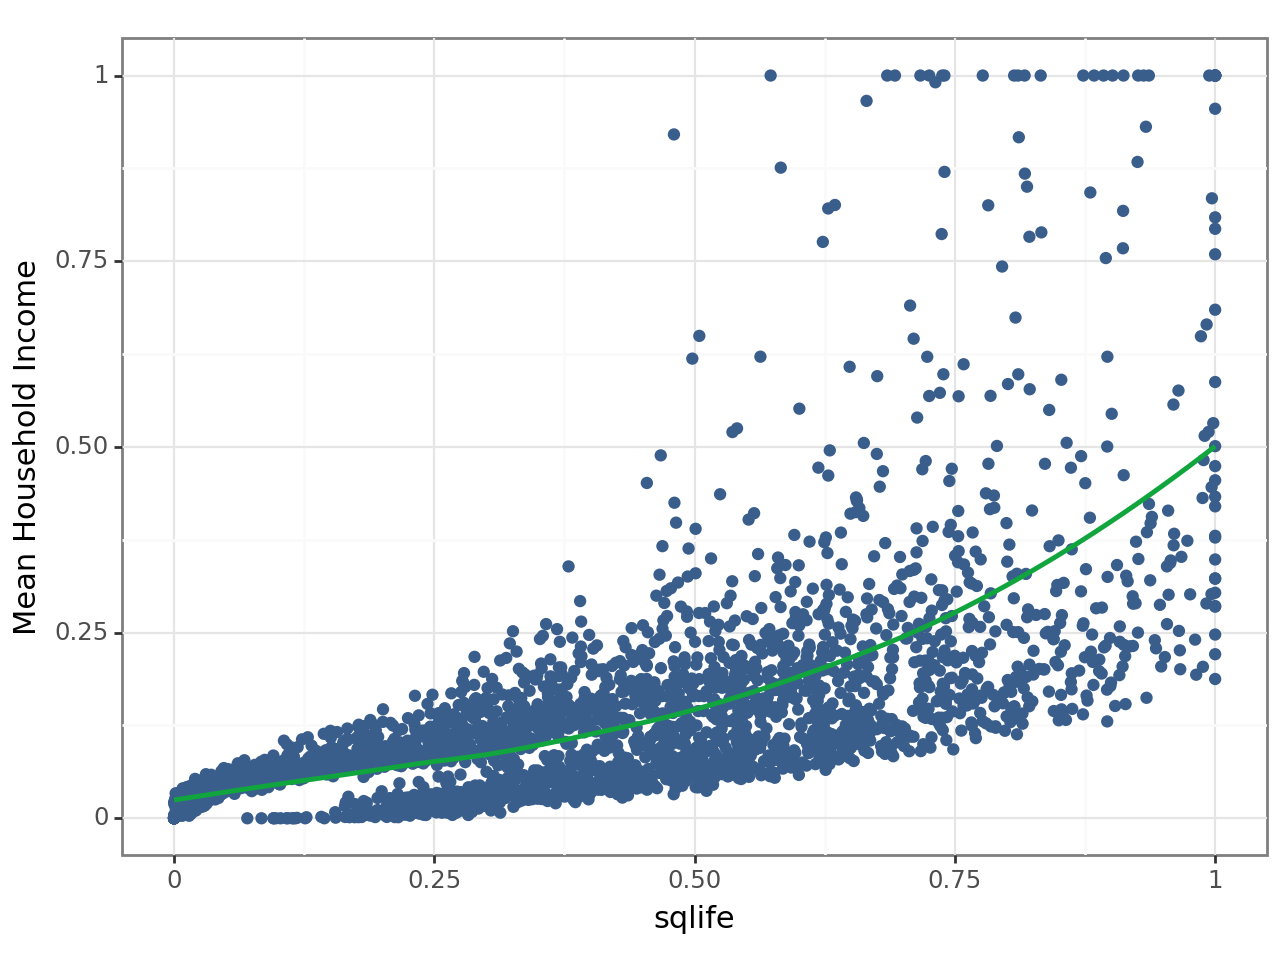

In [ ]:
p3 = p1 + geom_smooth(method="loess", color=color[1], se=False)
print(p3)

In [ ]:
scaled_df.columns

Index(['Year', 'Income Percentile', 'Percentile Count',
       'Mean Household Income', 'Unadjusted Life Expectancy',
       'Race-Adjusted Life Expectancy',
       'Standard Error of Unadjusted Life Expectancy',
       'Standard Error of Race-Adjusted Life Expectancy', 'Female', 'Male',
       'sqlife'],
      dtype='object')

We will perform Ordinary Least Square analysis to compare the relationships between various dependent variables and Mean Household Income. We will first observe OLS with Race-Adjusted Life Expectancy, the squared Race-Adjusted Life Expectancy. Note the better fit in OLS with squared Race-Adjusted Life Expectancy as seen by the increase in R-squared. We will then continue to add other dependent variables to see both R-squared increasing, as well as any potential changes to the coefficients of previously observed dependent variables.

In [ ]:
m1 = smf.ols('Q("Mean Household Income") ~ Q("Race-Adjusted Life Expectancy")', data=scaled_df).fit()

m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("Mean Household Income")   R-squared:                       0.331
Model:                                    OLS   Adj. R-squared:                  0.331
Method:                         Least Squares   F-statistic:                     1383.
Date:                        Thu, 29 Jun 2023   Prob (F-statistic):          2.16e-246
Time:                                22:19:48   Log-Likelihood:                 1814.7
No. Observations:                        2800   AIC:                            -3625.
Df Residuals:                            2798   BIC:                            -3614.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0796      0.006    -12.360      0.000      -0.092      -0.067
Q("Race-Adjusted Life Expectancy")     0.3728      0.010     37.194      0.000       0.353       0.392
==============================================================================
Omnibus:                     1959.408   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29539.887
Skew:                           3.203   Prob(JB):                         0.00
Kurtosis:                      17.566   Cond. No.                         5.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m = smf.ols('Q("Mean Household Income") ~ Q("sqlife")', data=scaled_df).fit()

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("Mean Household Income")   R-squared:                       0.402
Model:                                    OLS   Adj. R-squared:                  0.402
Method:                         Least Squares   F-statistic:                     1881.
Date:                        Thu, 29 Jun 2023   Prob (F-statistic):          8.84e-315
Time:                                22:19:48   Log-Likelihood:                 1972.2
No. Observations:                        2800   AIC:                            -3940.
Df Residuals:                            2798   BIC:                            -3929.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0147      0.004     -3.439      0.001      -0.023      -0.006
Q("sqlife")     0.3816      0.009     43.373      0.000       0.364       0.399
==============================================================================
Omnibus:                     1896.741   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28203.580
Skew:                           3.059   Prob(JB):                         0.00
Kurtosis:                      17.293   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m2 = smf.ols('Q("Mean Household Income") ~ Q("sqlife") + Q("Year")', data=scaled_df).fit()

m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("Mean Household Income")   R-squared:                       0.429
Model:                                    OLS   Adj. R-squared:                  0.428
Method:                         Least Squares   F-statistic:                     1050.
Date:                        Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                                22:19:48   Log-Likelihood:                 2036.3
No. Observations:                        2800   AIC:                            -4067.
Df Residuals:                            2797   BIC:                            -4049.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0177      0.005      3.504      0.000       0.008       0.028
Q("sqlife")     0.4046      0.009     45.809      0.000       0.387       0.422
Q("Year")      -0.0838      0.007    -11.445      0.000      -0.098      -0.069
==============================================================================
Omnibus:                     1915.866   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28891.144
Skew:                           3.098   Prob(JB):                         0.00
Kurtosis:                      17.465   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m3 = smf.ols('Q("Mean Household Income") ~ Q("sqlife") + Q("Year")+ Q("Female")', data=scaled_df).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("Mean Household Income")   R-squared:                       0.608
Model:                                    OLS   Adj. R-squared:                  0.608
Method:                         Least Squares   F-statistic:                     1446.
Date:                        Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                                22:19:48   Log-Likelihood:                 2563.4
No. Observations:                        2800   AIC:                            -5119.
Df Residuals:                            2796   BIC:                            -5095.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0437      0.004     10.291      0.000       0.035       0.052
Q("sqlife")     0.5640      0.009     65.819      0.000       0.547       0.581
Q("Year")      -0.1139      0.006    -18.597      0.000      -0.126      -0.102
Q("Female")    -0.1534      0.004    -35.755      0.000      -0.162      -0.145
==============================================================================
Omnibus:                     2293.824   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54603.610
Skew:                           3.838   Prob(JB):                         0.00
Kurtosis:                      23.227   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m4 = smf.ols('Q("Mean Household Income") ~ Q("sqlife") + Q("Year")+ Q("Female") + Q("Income Percentile")', data=scaled_df).fit()

m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q("Mean Household Income")   R-squared:                       0.617
Model:                                    OLS   Adj. R-squared:                  0.617
Method:                         Least Squares   F-statistic:                     1126.
Date:                        Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                                22:19:48   Log-Likelihood:                 2596.3
No. Observations:                        2800   AIC:                            -5183.
Df Residuals:                            2795   BIC:                            -5153.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0054      0.006      0.859      0.390      -0.007       0.018
Q("sqlife")                0.3656      0.026     14.169      0.000       0.315       0.416
Q("Year")                 -0.0764      0.008    -10.048      0.000      -0.091      -0.062
Q("Female")               -0.1017      0.008    -13.326      0.000      -0.117      -0.087
Q("Income Percentile")     0.1511      0.019      8.141      0.000       0.115       0.187
==============================================================================
Omnibus:                     2427.018   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65577.188
Skew:                           4.138   Prob(JB):                         0.00
Kurtosis:                      25.217   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Machine Learning linkage with Econometric Analysis

We will begin Machine Learning modeling to see if our ML techniques can be used to create a linkage with our econometric analysis. First, we should ensure all variables are the same type.

In [ ]:
#Check all variables are same type
scaled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             2800 non-null   float64
 1   Income Percentile                                2800 non-null   float64
 2   Percentile Count                                 2800 non-null   float64
 3   Mean Household Income                            2800 non-null   float64
 4   Unadjusted Life Expectancy                       2800 non-null   float64
 5   Race-Adjusted Life Expectancy                    2800 non-null   float64
 6   Standard Error of Unadjusted Life Expectancy     2800 non-null   float64
 7   Standard Error of Race-Adjusted Life Expectancy  2800 non-null   float64
 8   Female                                           2800 non-null   float64
 9   Male                          

For our first set of models (which include Linear Regression, Lasso, Ridge, Elastic Net, Decision Tree, Random Forest, XBG, and SVR), we will use all the features for initial results in predicting Mean Household Income.

In [ ]:
#PREDICTION MODEL 1: In this model, we will use all the features to get the initial results.
# load the data
data = scaled_df

# split the data into features and target variable
X = data.drop(['Mean Household Income'], axis=1)
y = data['Mean Household Income']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.2)
ridge = Ridge(alpha=0.2)
en = ElasticNet(alpha=0.2)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# # print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))

Linear Regression R-squared: 0.684, MSE: 0.009
Lasso Regression R-squared: -0.003, MSE: 0.028
Ridge Regression R-squared: 0.658, MSE: 0.010
ElasticNet R-squared: -0.003, MSE: 0.028
Decision Trees Regression R-squared: 0.993, MSE: 0.000
Random Forest Regression R-squared: 0.997, MSE: 0.000
XGBoost Regression R-squared: 0.998, MSE: 0.000
SVM Regression R-squared: 0.718, MSE: 0.008


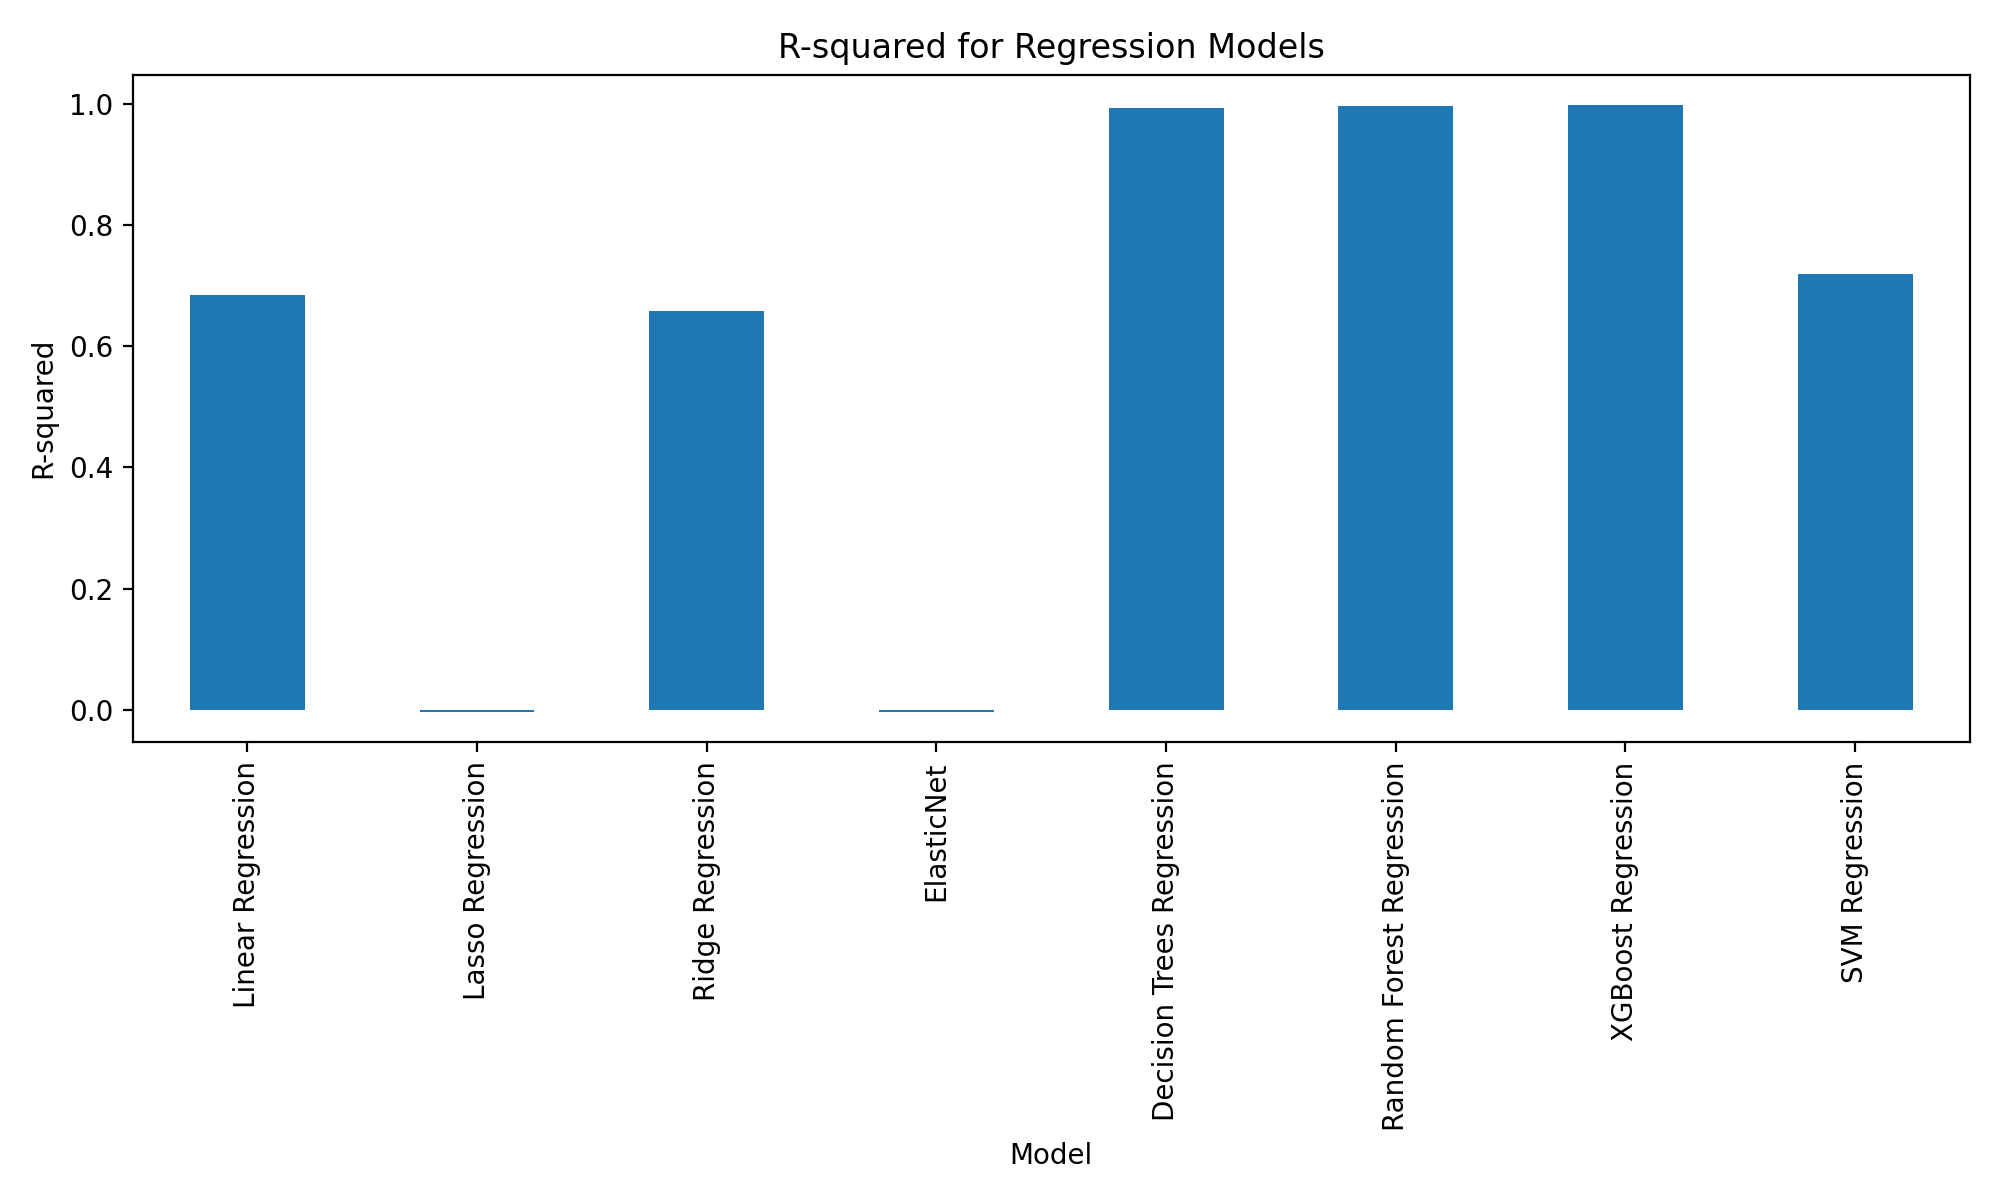

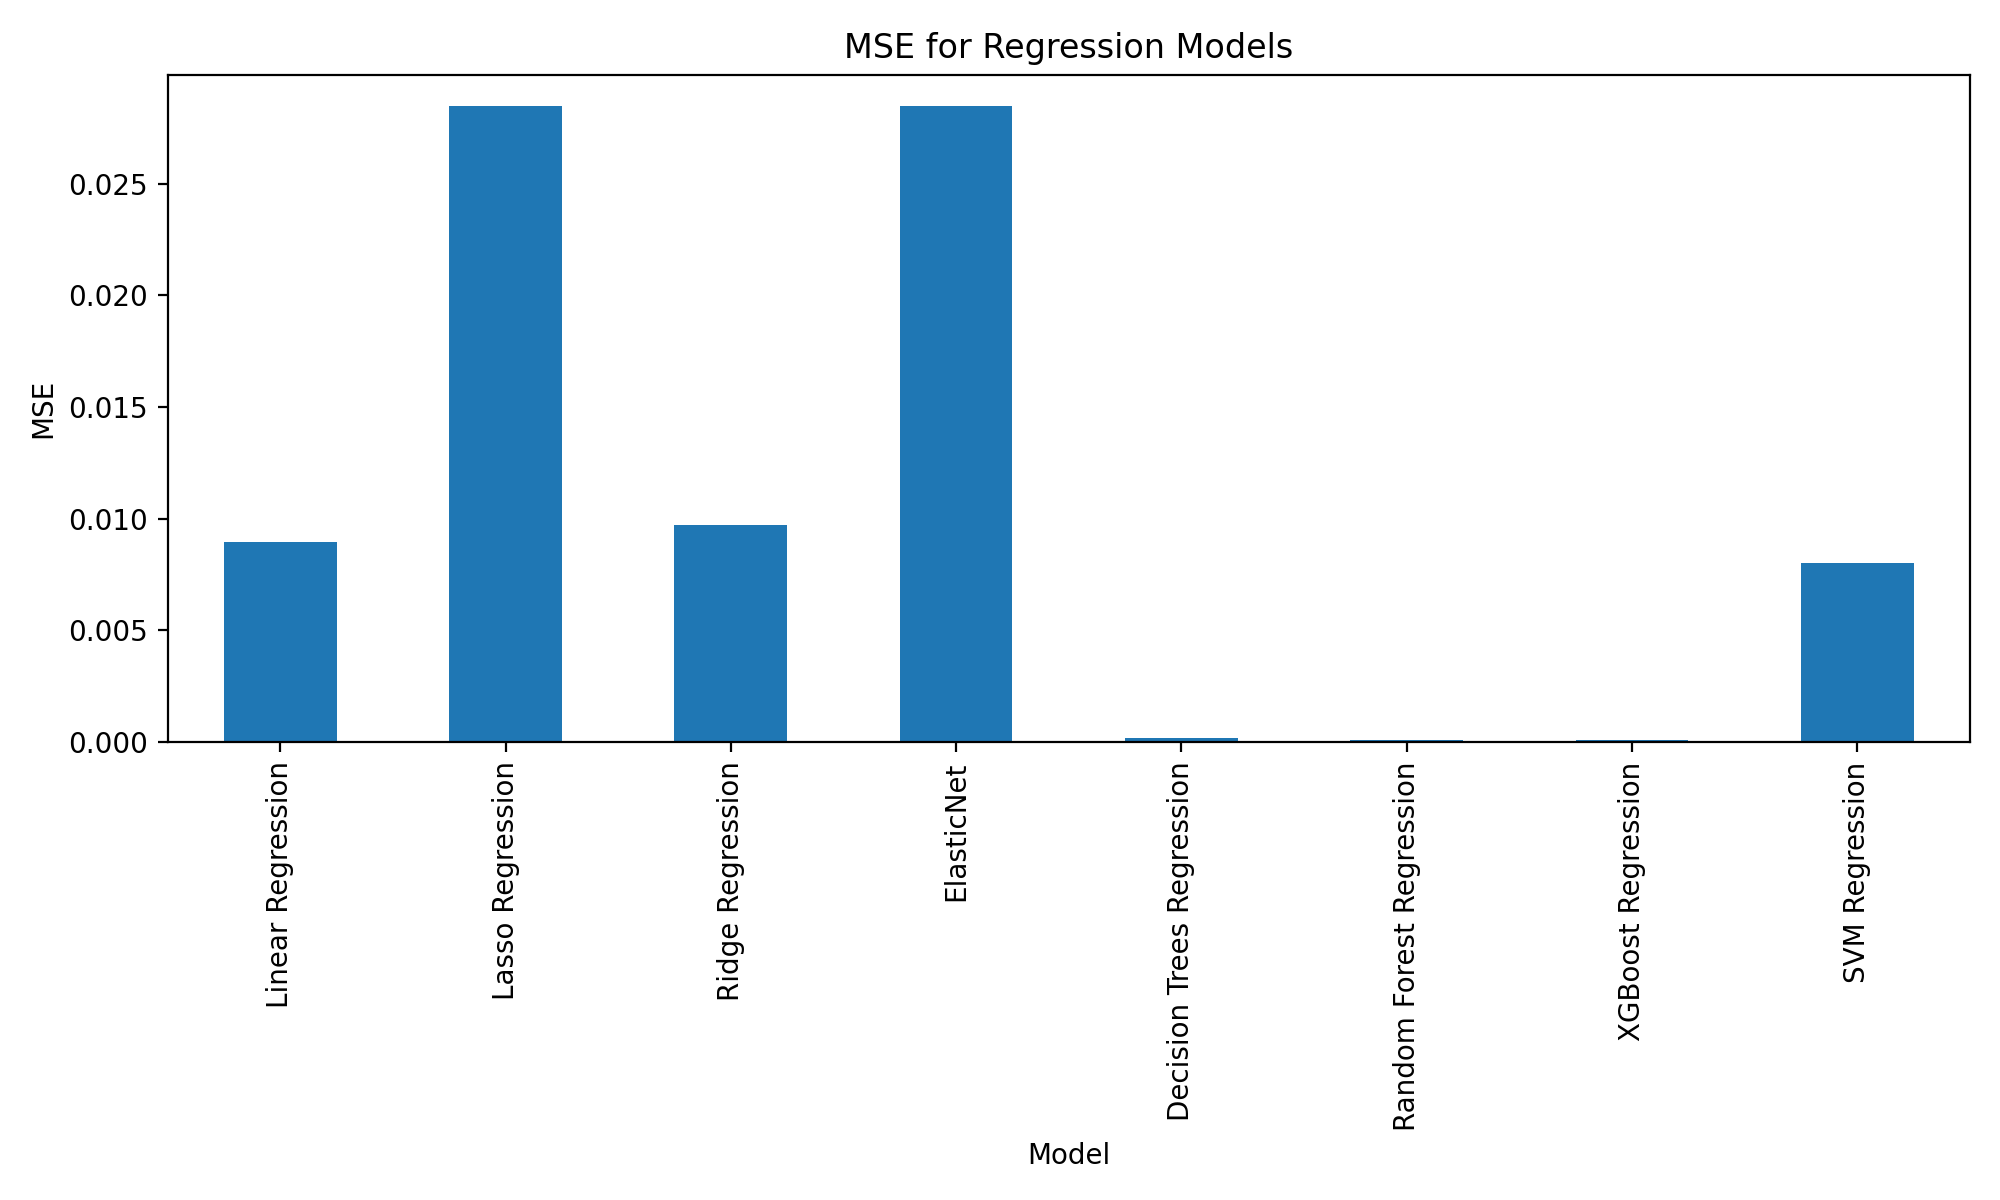

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.tight_layout()
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.tight_layout()
plt.show()

Based on R-Squared and MSE, we can clearly observe overfitting for the ML models. We will uncover this problem with feature importance. As seen below, Income Percentile was essentially the only contributing feature for Random Forest. This makes sense as Income Percentile is derived from Mean Household Income. 

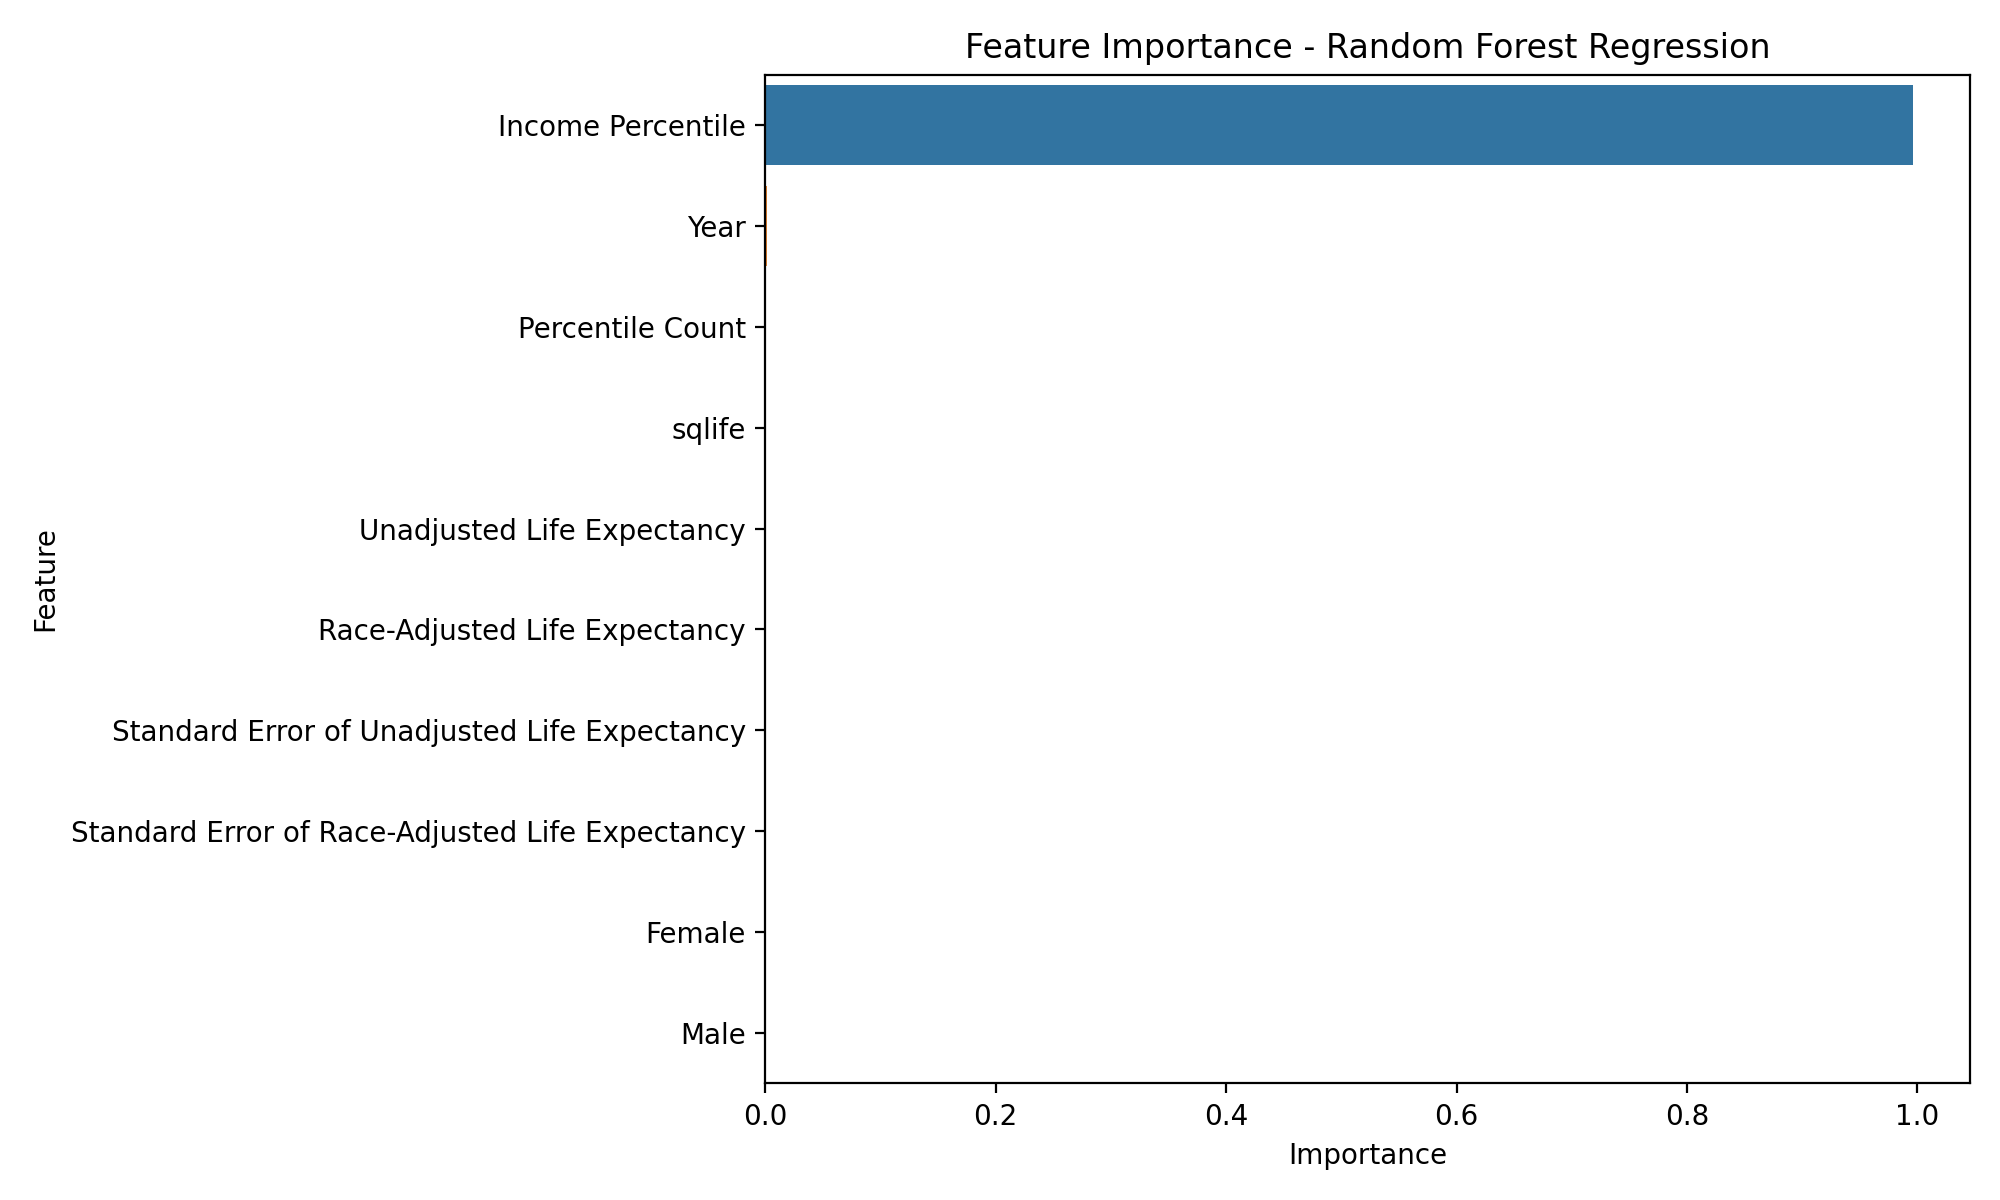

In [ ]:
#Feature importance for random forest because random forest is the best model for the first prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

We will drop Income Percentile (which caused severe overfitting in ML models), to see if our models can perform more reasonably.

In [ ]:
#PREDICTION MODEL 2: In this model, we will drop Income Percentile to see if models are still useful because Income Percentile is highly correlated with Mean Household Income.
# load the data
data2 = scaled_df

# split the data into features and target variable
X = data.drop(['Mean Household Income', 'Income Percentile'], axis=1)
y = data['Mean Household Income']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.664, MSE: 0.010
Lasso Regression R-squared: -0.003, MSE: 0.028
Ridge Regression R-squared: 0.654, MSE: 0.010
ElasticNet R-squared: -0.003, MSE: 0.028
Decision Trees Regression R-squared: 0.702, MSE: 0.008
Random Forest Regression R-squared: 0.788, MSE: 0.006
XGBoost Regression R-squared: 0.783, MSE: 0.006
SVM Regression R-squared: 0.693, MSE: 0.009


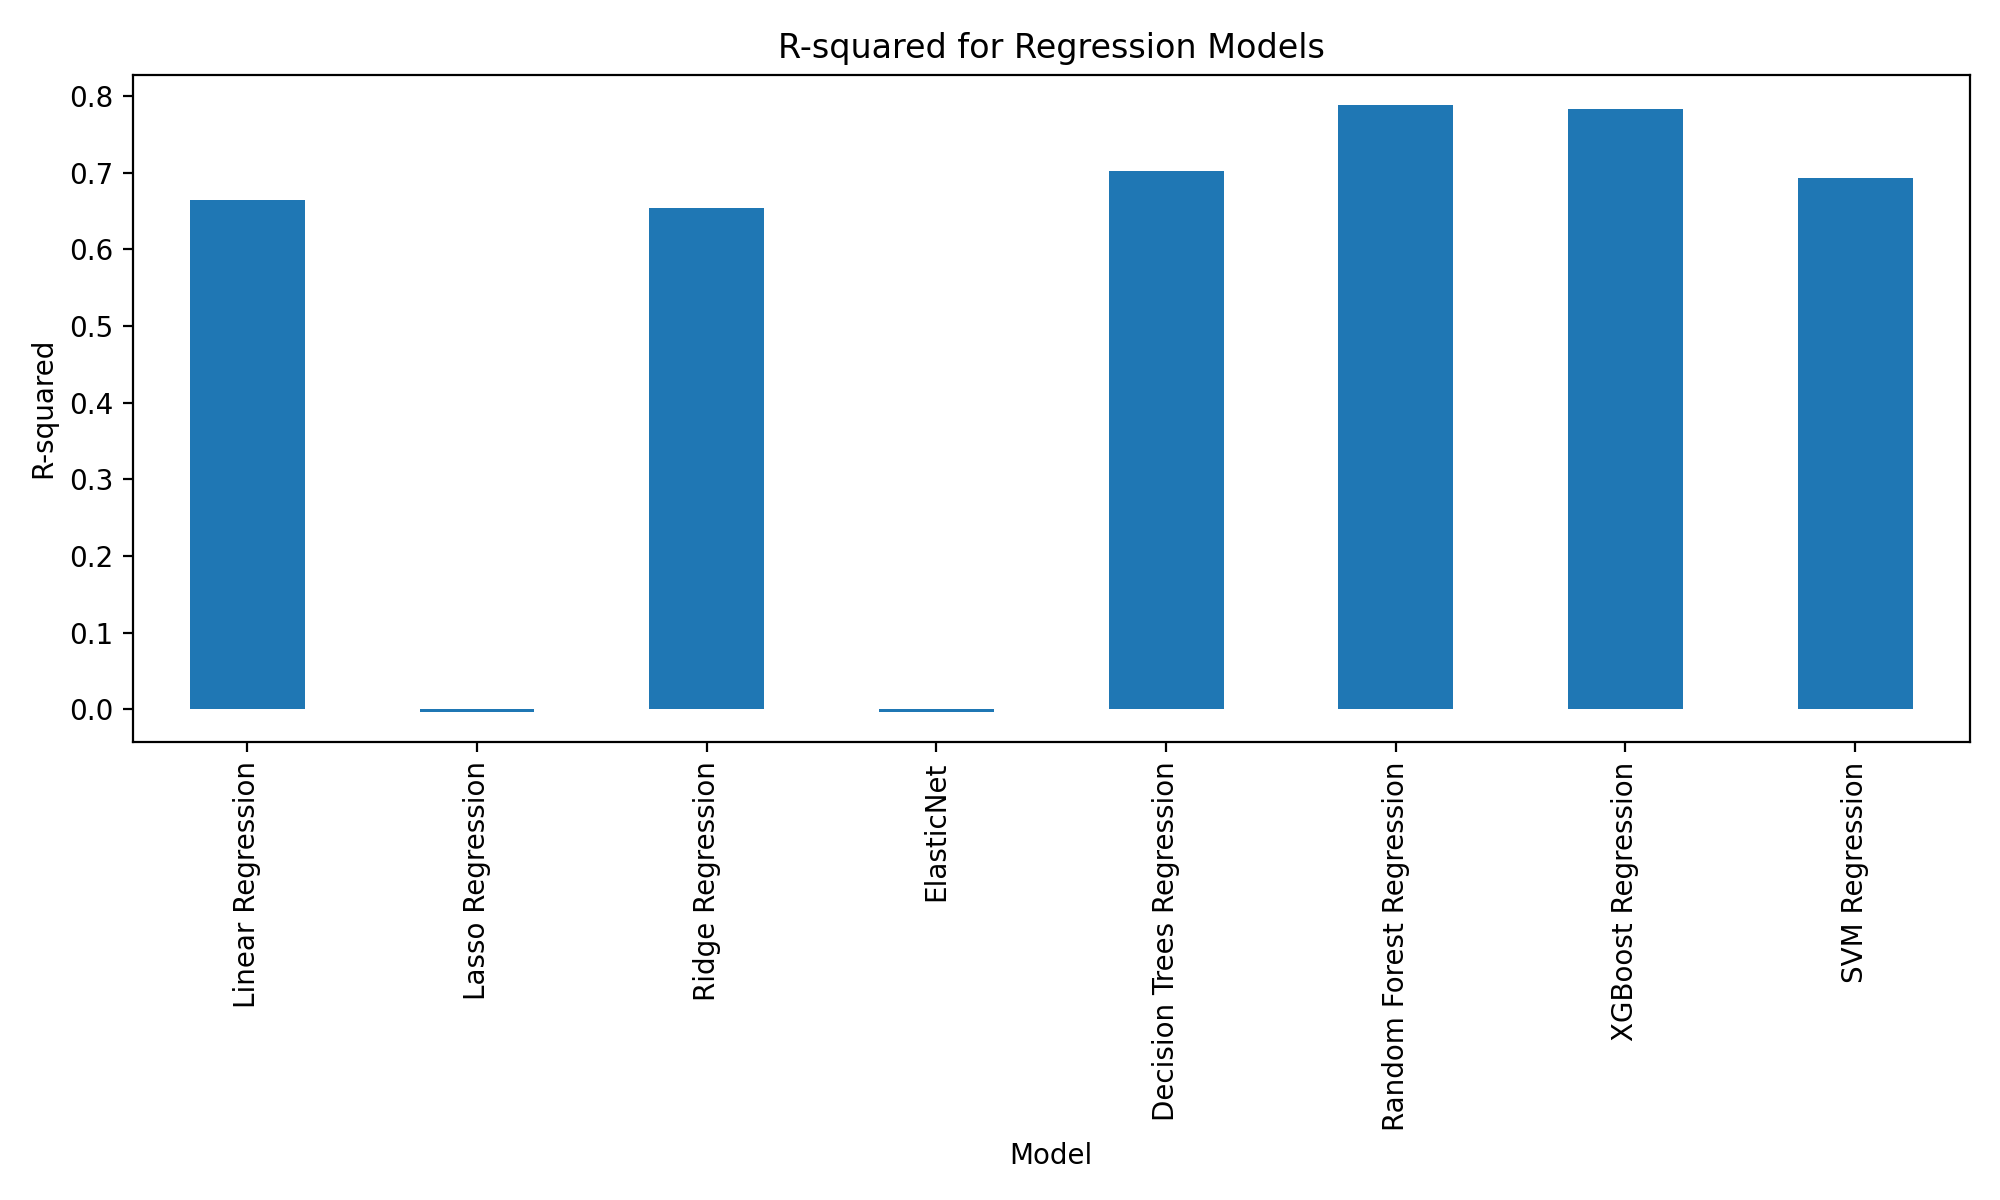

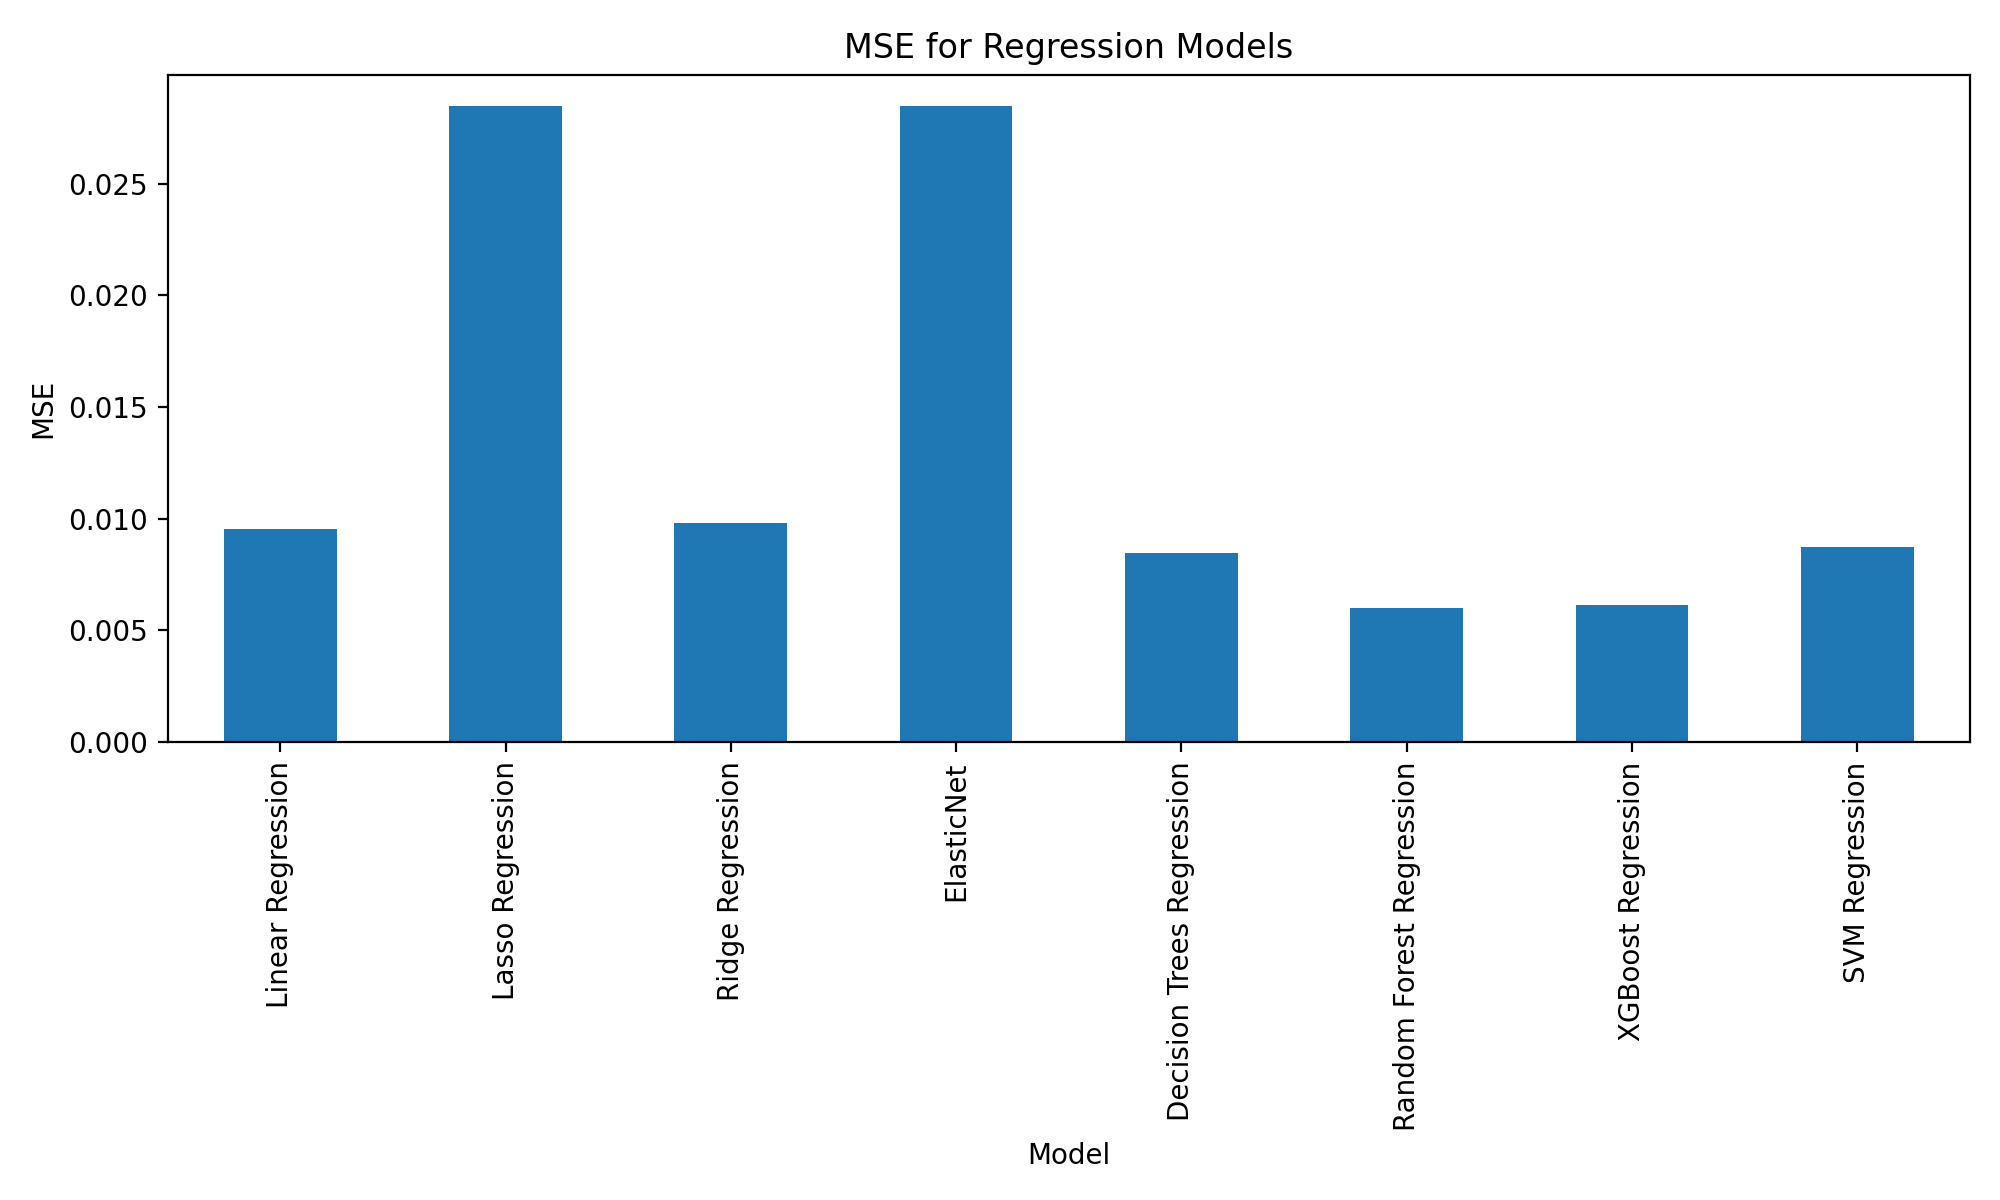

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.tight_layout()
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.tight_layout()
plt.show()

The ML models performed more reasonably as seen by the lowered R-Squared values and higher MSE. When taking a look at the feature importance, we can see various features contributed to predicting Mean Household Income.

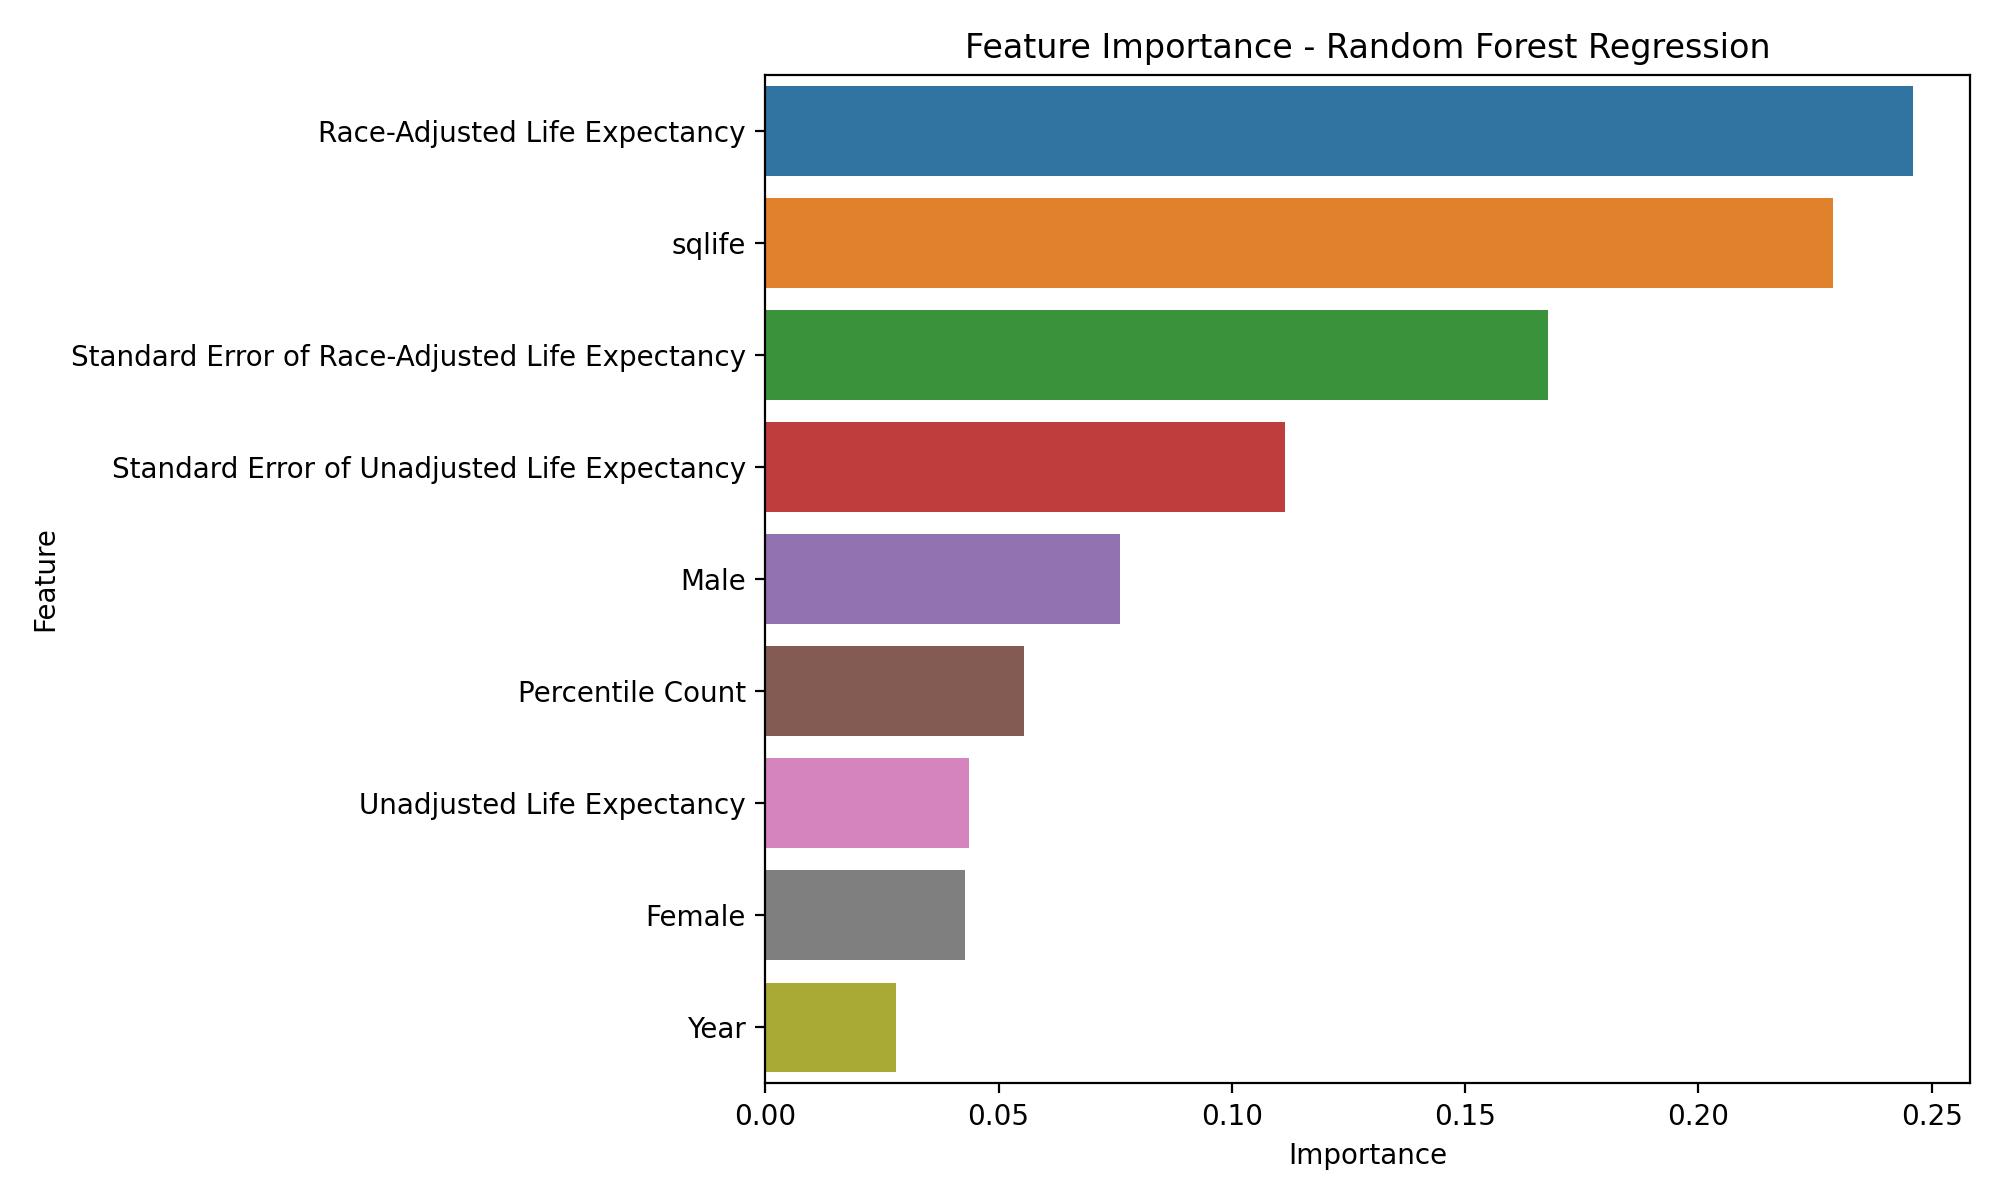

In [ ]:
#Feature importance for random forest because random forest is the best model for the second prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

We will fit our final set of models after dropping the various collinear variables. This will include Unadjusted Life Expectancy (highly correlated with Race-Adjusted Life Expectancy), Standard Error of Unadjusted Life Expectancy (highly correlated with Standard Error of Race-Adjusted Life Expectancy), and Male (highly correlated with Female).

In [ ]:
# PREDICTION MODEL 3: In this model, we will keep only the non-collinear variables with high feature importance using the information from the last models. 

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data3 = scaled_df

# split the data into features and target variable
X = data.drop(['Mean Household Income', 'Income Percentile', 'Unadjusted Life Expectancy', 'Standard Error of Unadjusted Life Expectancy','Male'], axis=1)
y = data['Mean Household Income']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.634, MSE: 0.010
Lasso Regression R-squared: -0.003, MSE: 0.028
Ridge Regression R-squared: 0.634, MSE: 0.010
ElasticNet R-squared: -0.003, MSE: 0.028
Decision Trees Regression R-squared: 0.691, MSE: 0.009
Random Forest Regression R-squared: 0.782, MSE: 0.006
XGBoost Regression R-squared: 0.758, MSE: 0.007
SVM Regression R-squared: 0.691, MSE: 0.009


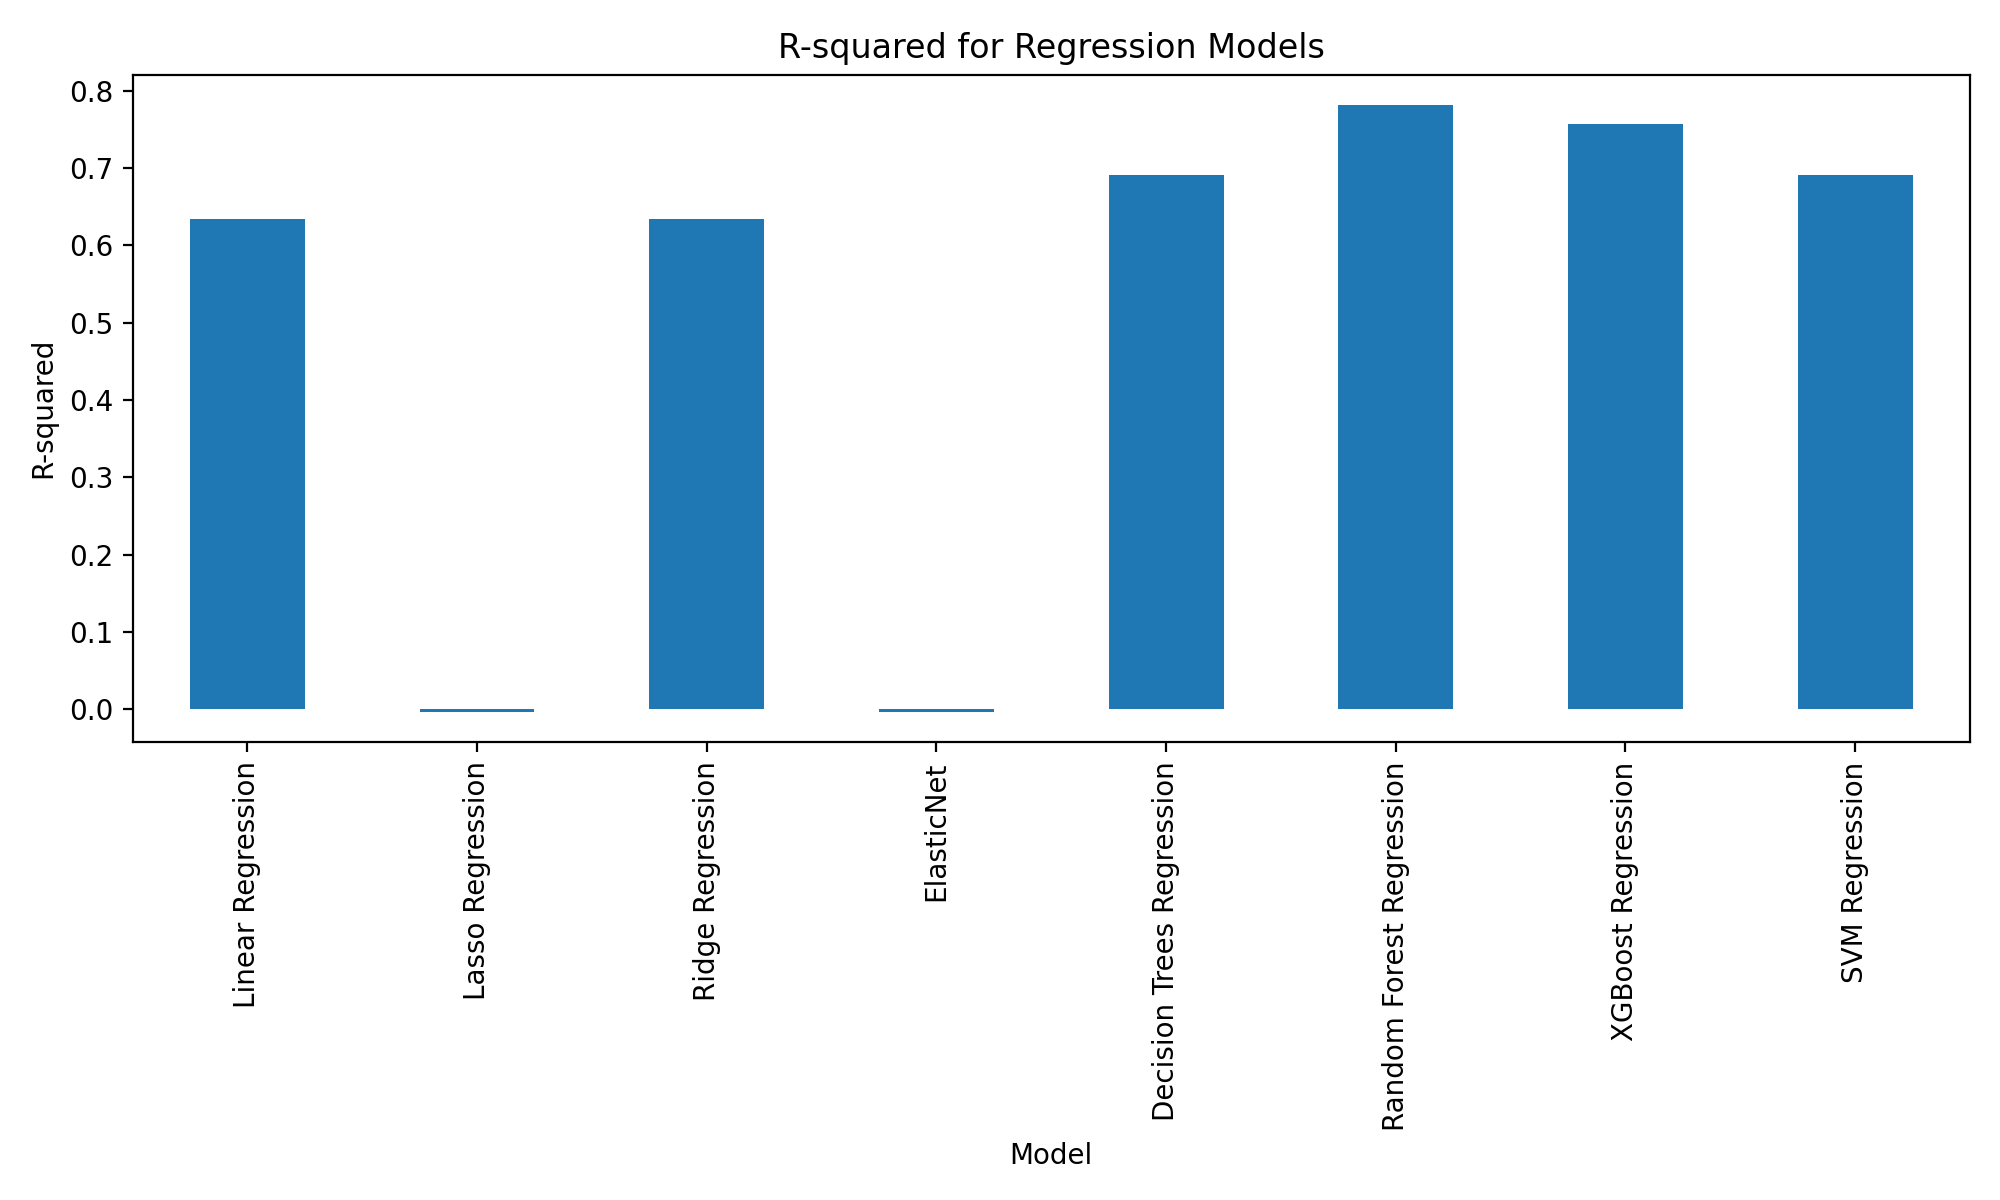

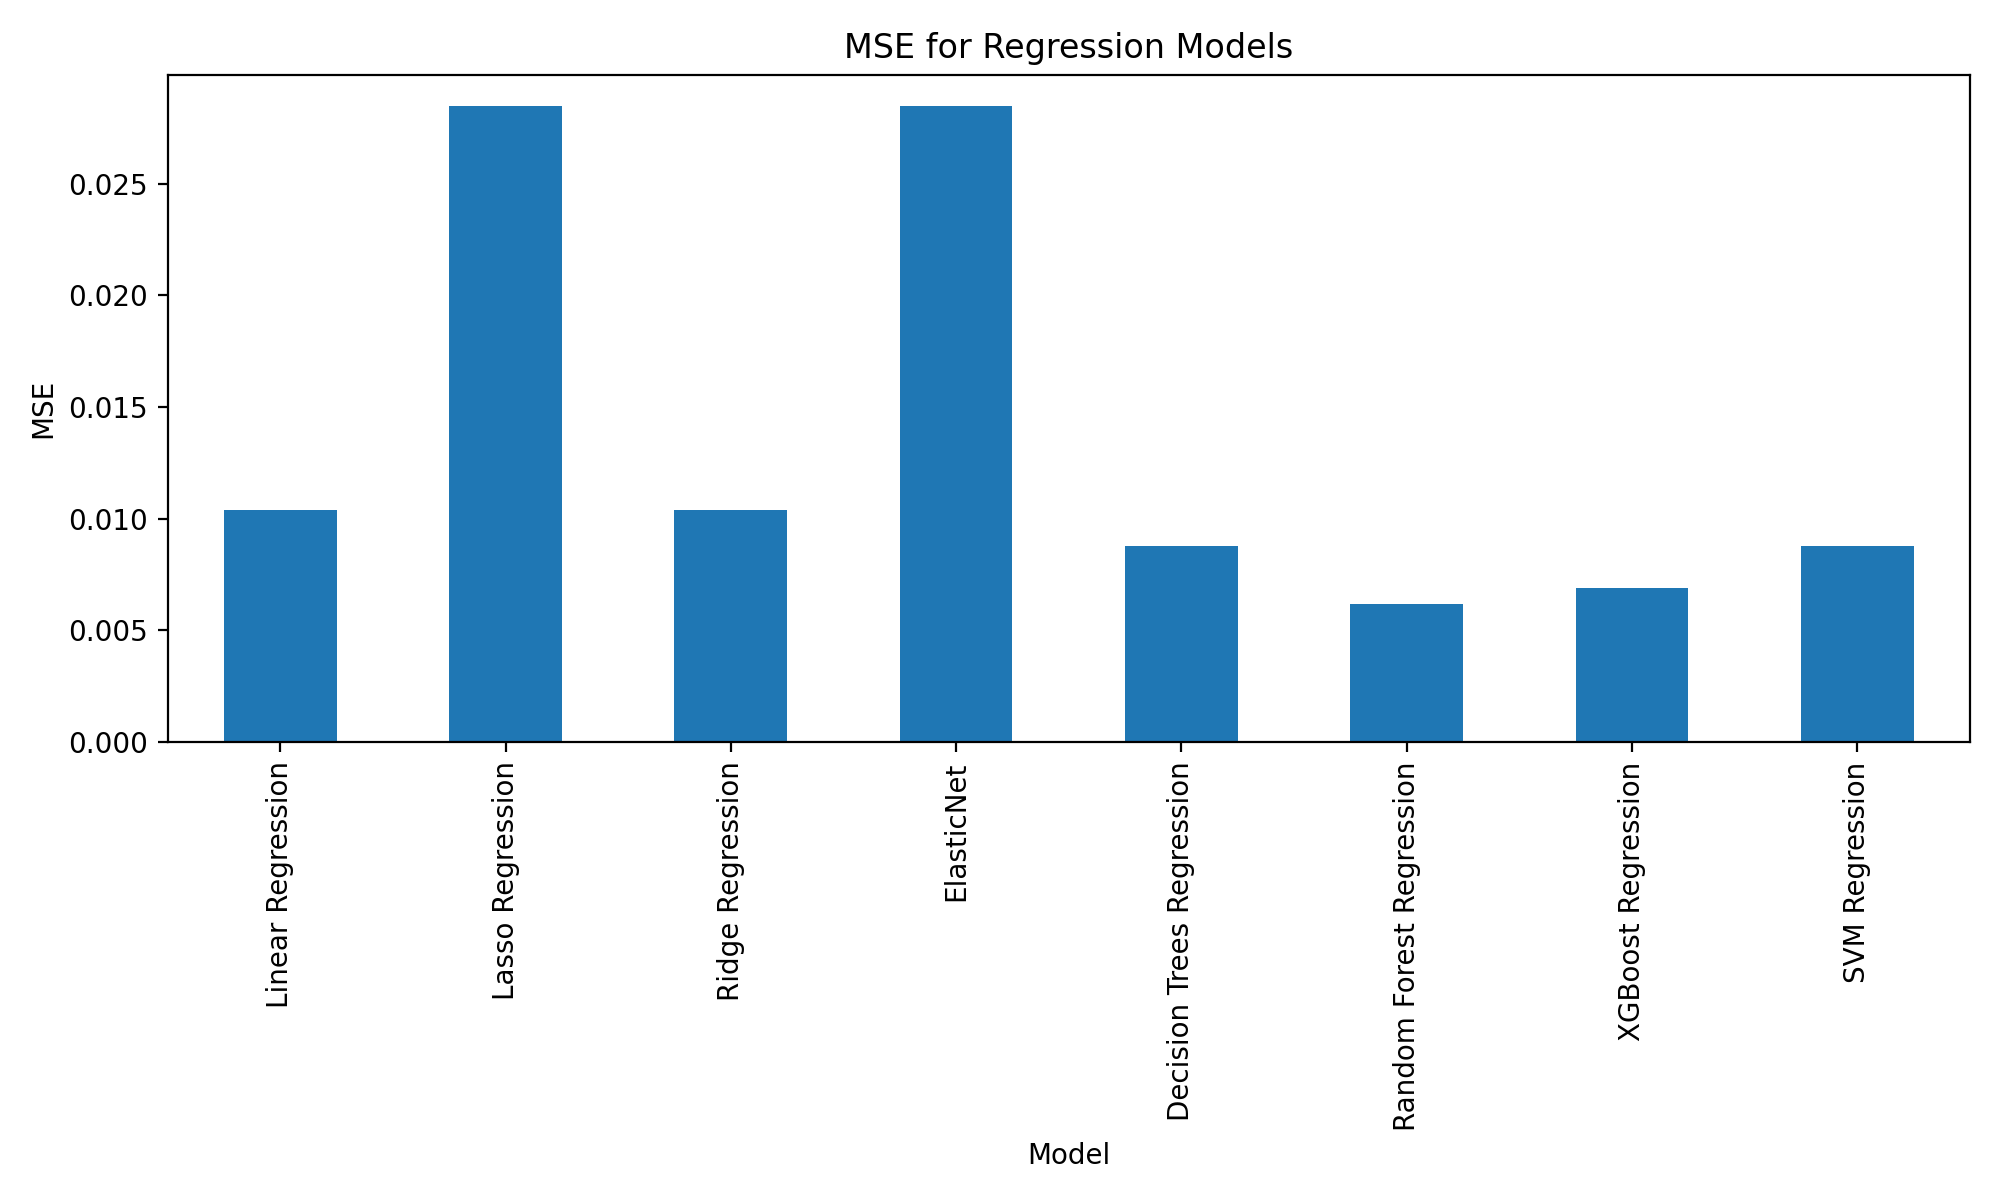

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.tight_layout()
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.tight_layout()

plt.show()


From the feature importance, we can see that the models primarily relied on sqlife, Standard Error of Race-Adjusted Life Expectancy, Race-Adjusted Life Expectancy, and Female to predict Mean Household Income.

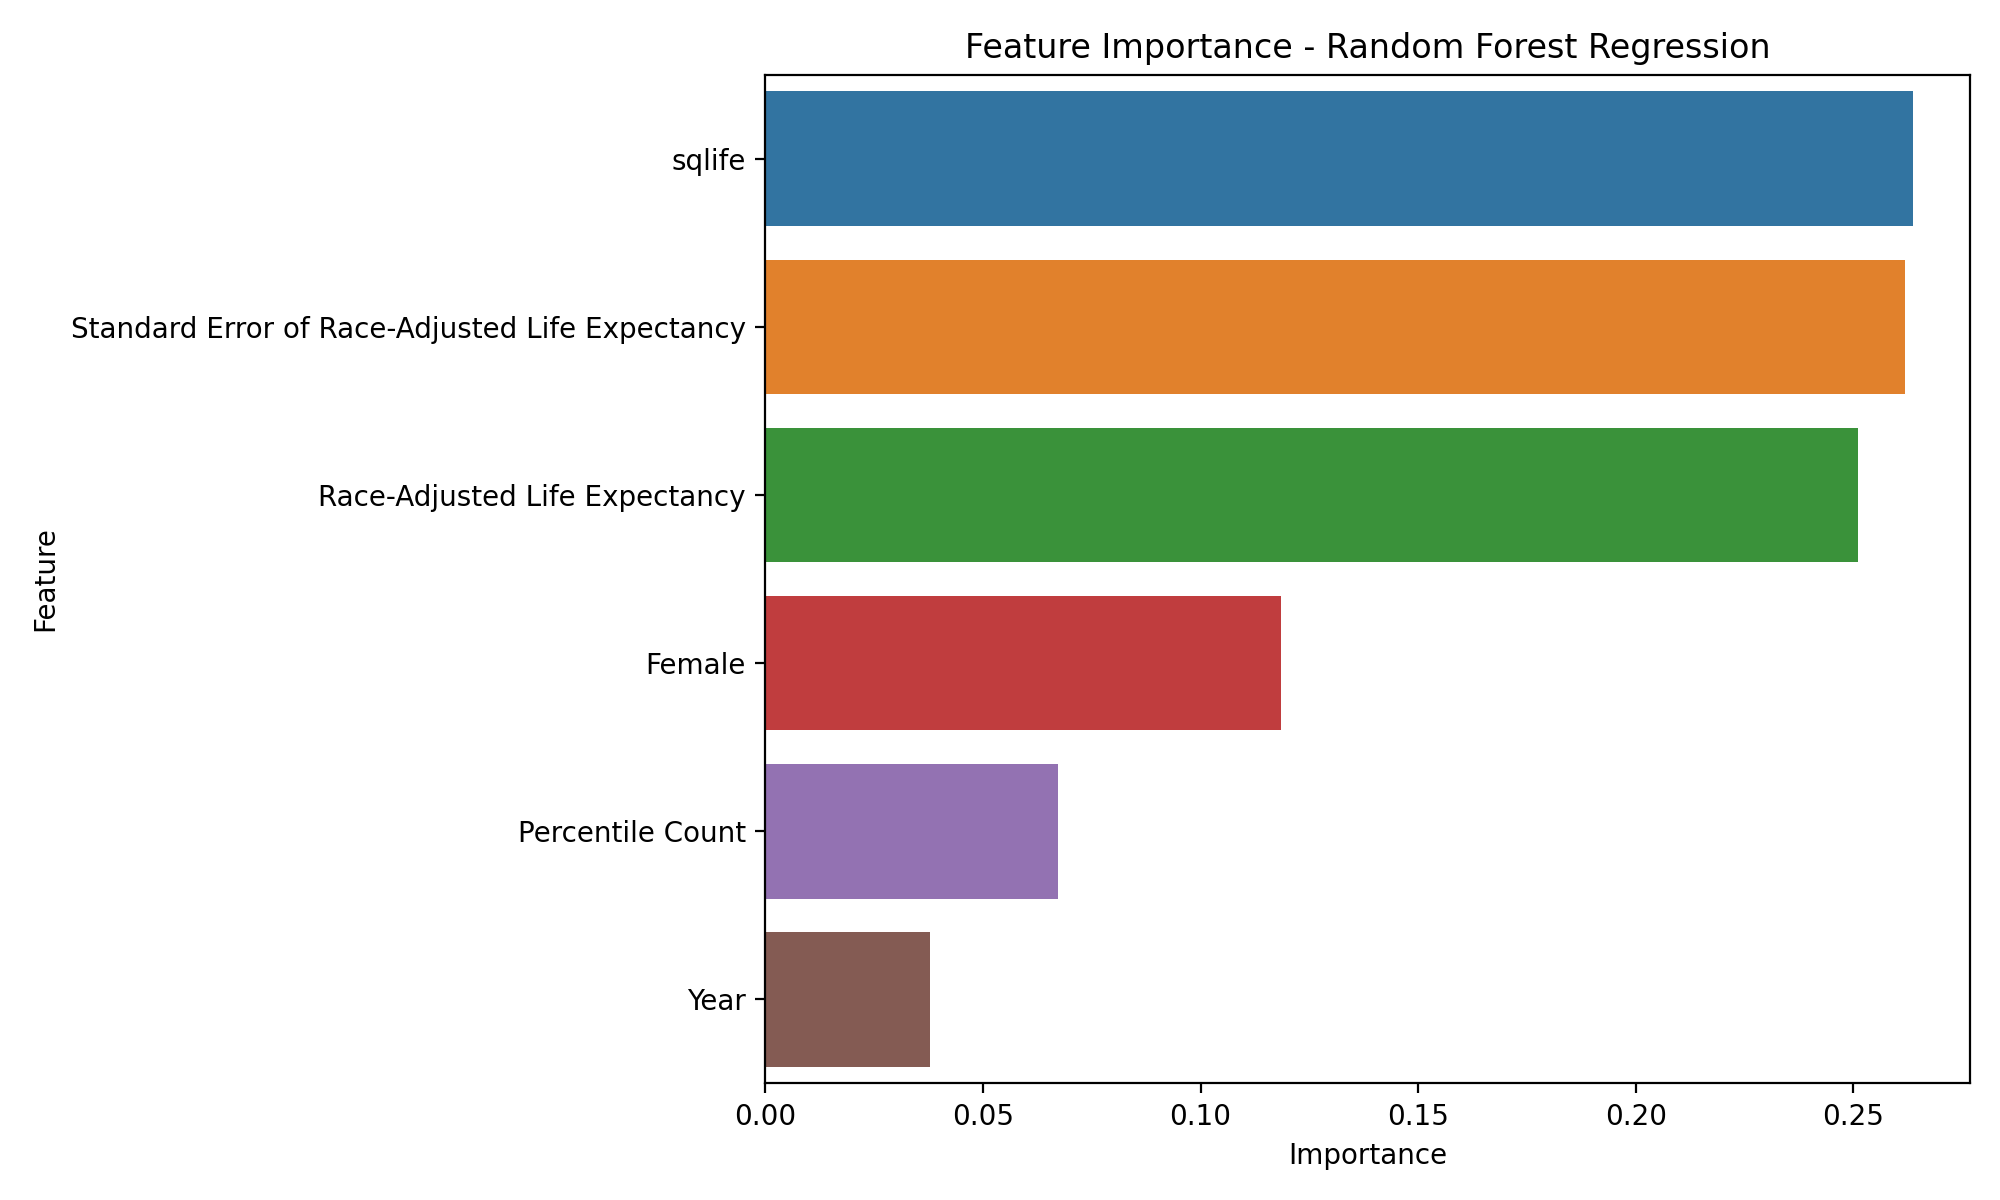

In [ ]:
#Feature importance for random forest because random forest is the best model for the second prediction.
# Calculate feature importance for RandomForestRegressor
rf_feature_importance = rf.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Linear Regression
R-squared: 0.6343177495048687
Mean Squared Error: 0.010377211386573472
Root Mean Squared Error: 0.10186859862869162

Lasso
R-squared: -0.003070635944178557
Mean Squared Error: 0.02846481066763182
Root Mean Squared Error: 0.16871517616276202

Ridge
R-squared: 0.6276931504533139
Mean Squared Error: 0.010565202093303697
Root Mean Squared Error: 0.10278716891374963

ElasticNet
R-squared: -0.003070635944178557
Mean Squared Error: 0.02846481066763182
Root Mean Squared Error: 0.16871517616276202

Decision Tree
R-squared: 0.6791980909740599
Mean Squared Error: 0.00910361172485405
Root Mean Squared Error: 0.09541284884570866

Random Forest
R-squared: 0.7817215061377976
Mean Squared Error: 0.006194235757639304
Root Mean Squared Error: 0.0787034672529699

XGBoost
R-squared: 0.7576410720119846
Mean Squared Error: 0.006877582446918512
Root Mean Squared Error: 0.08293119103762174

Support Vector Regression
R-squared: 0.6909269292048494
Mean Squared Error: 0.008770774586942575
Root 

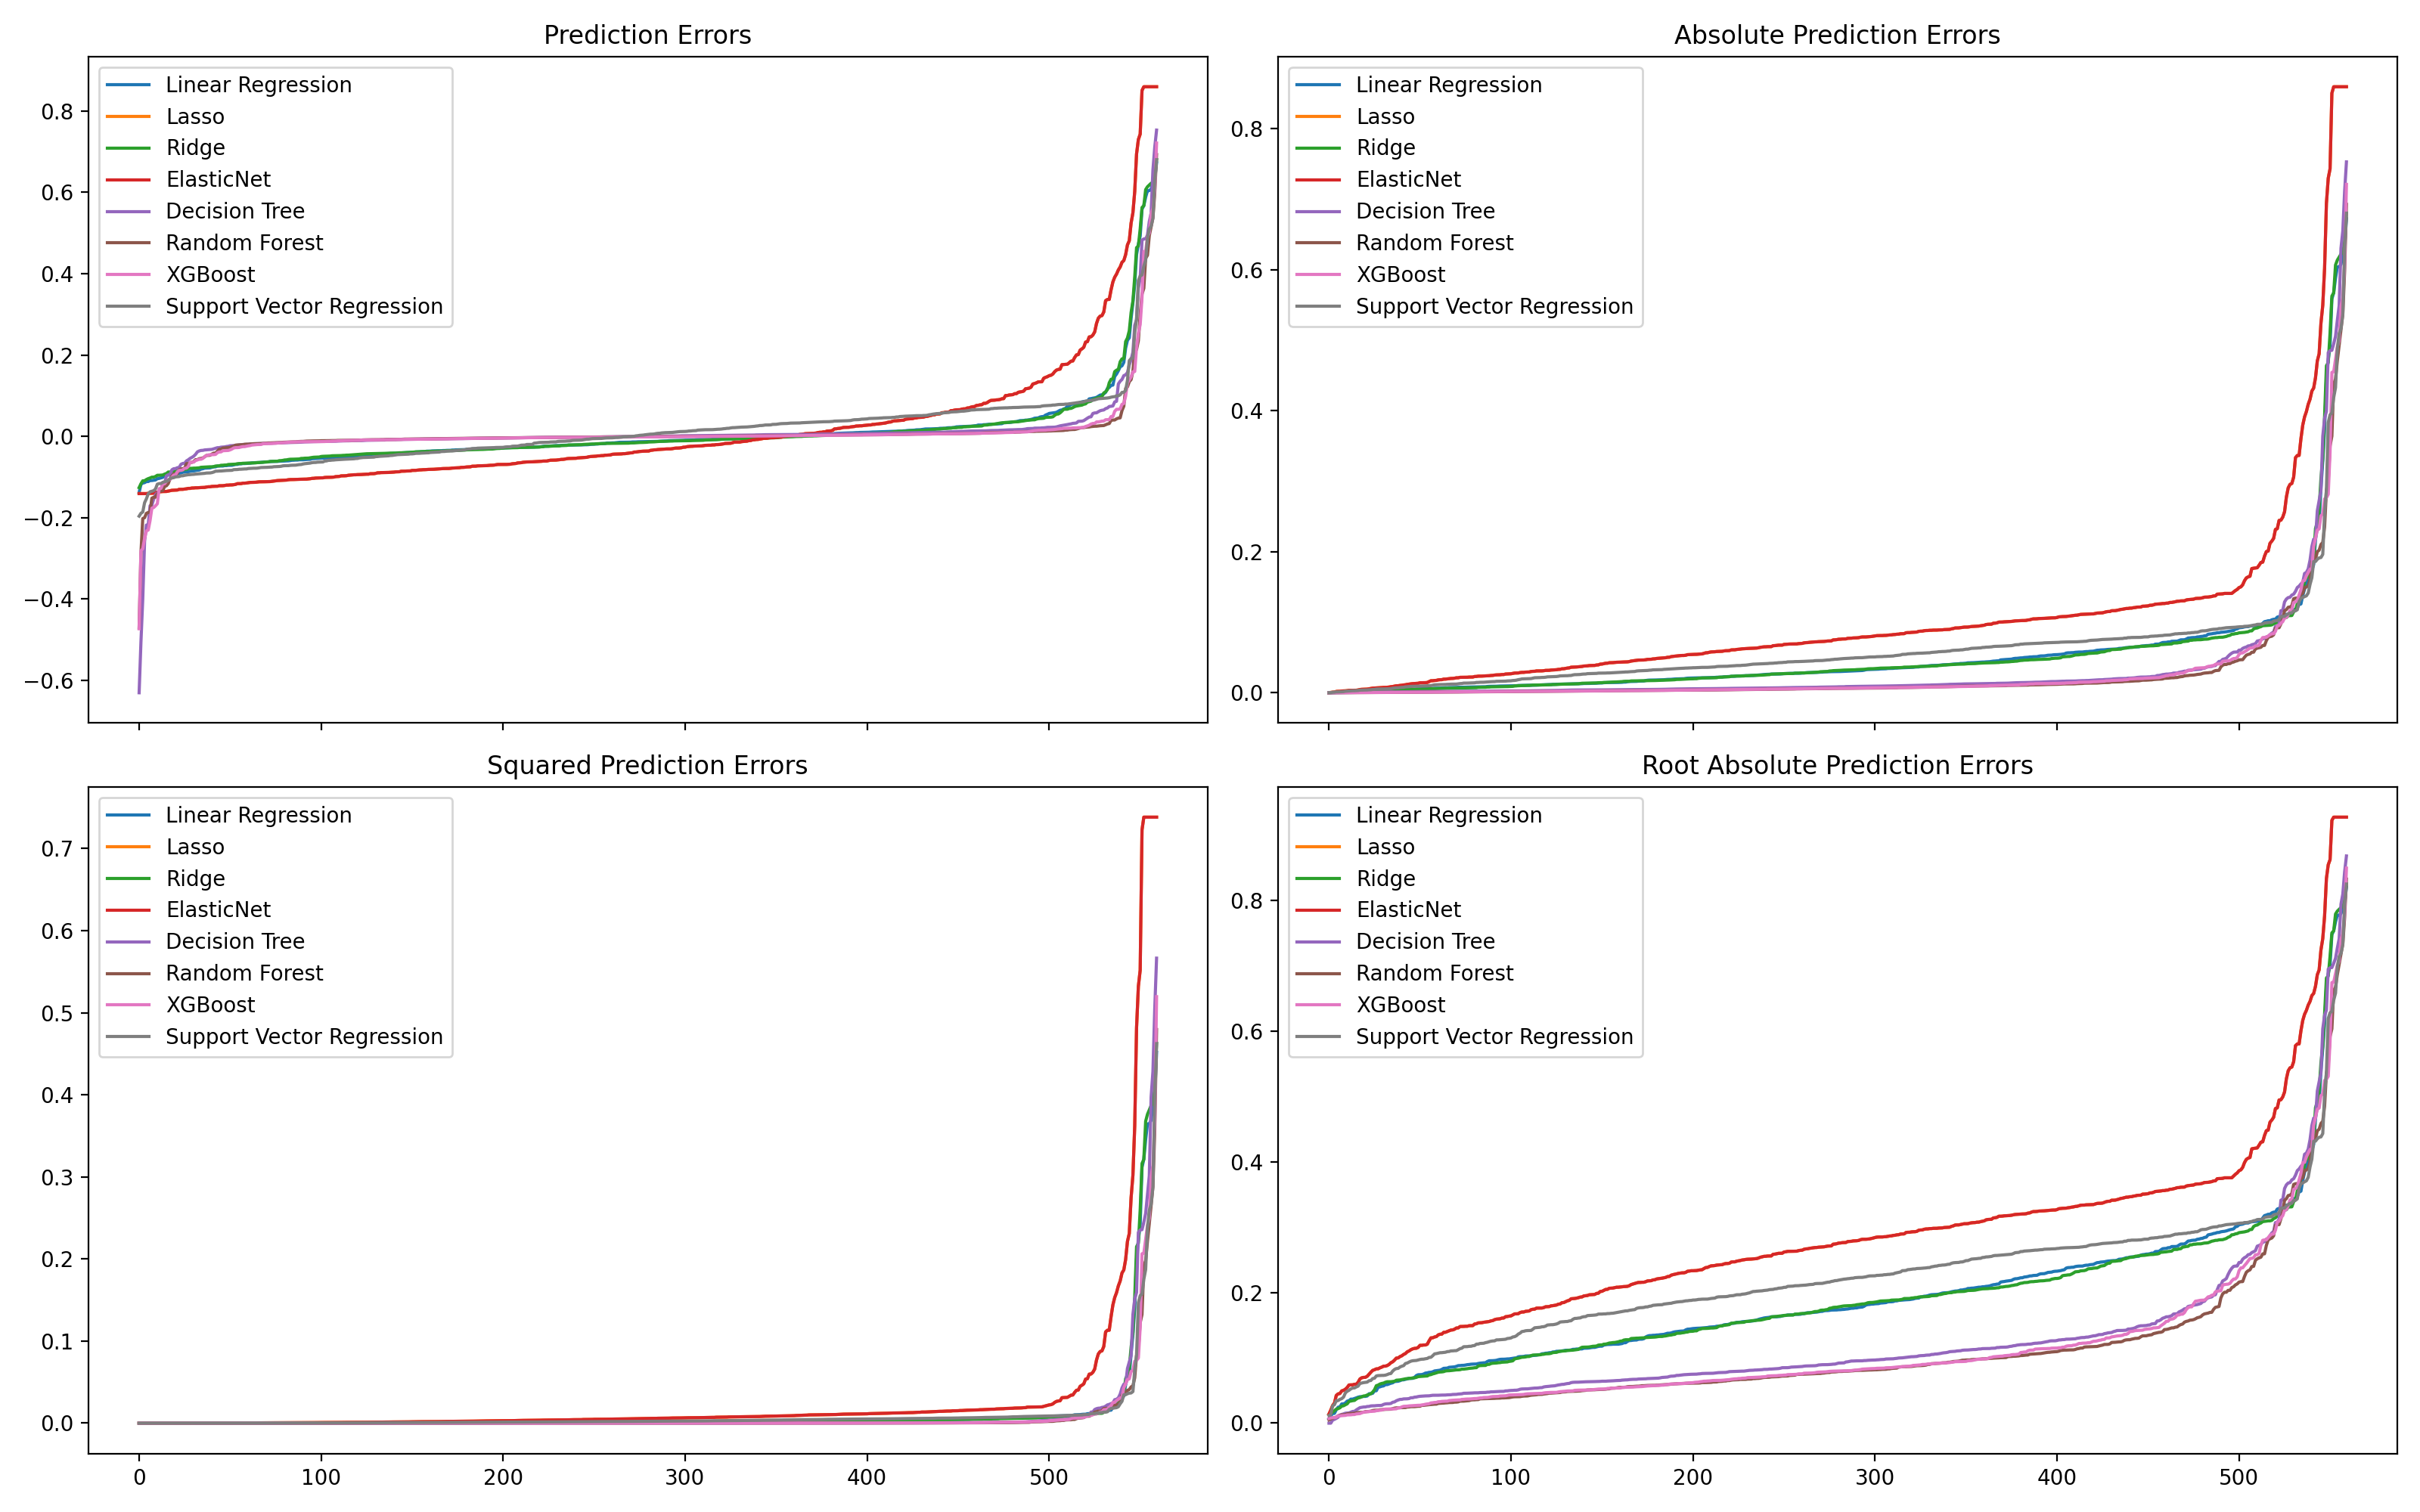

In [ ]:
# Visualize the results as prediction errors and loss values for model 3. 
import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = scaled_df

# split the data into features and target variable
X = data.drop(['Mean Household Income', 'Income Percentile', 'Unadjusted Life Expectancy', 'Standard Error of Unadjusted Life Expectancy','Male'], axis=1)
y = data['Mean Household Income']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the prediction errors
    errors = y_test - y_pred

    # Calculate the R-squared, mean squared error, and root mean squared error
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

    # Visualize the prediction errors and loss values as curves
    axes[0, 0].plot(sorted(errors), label=name)
    axes[0, 0].set_title("Prediction Errors")
    axes[0, 0].legend()

    axes[0, 1].plot(sorted(np.abs(errors)), label=name)
    axes[0, 1].set_title("Absolute Prediction Errors")
    axes[0, 1].legend()

    axes[1, 0].plot(sorted(errors ** 2), label=name)
    axes[1, 0].set_title("Squared Prediction Errors")
    axes[1, 0].legend()

    axes[1, 1].plot(sorted(np.sqrt(np.abs(errors))), label=name)
    axes[1, 1].set_title("Root Absolute Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


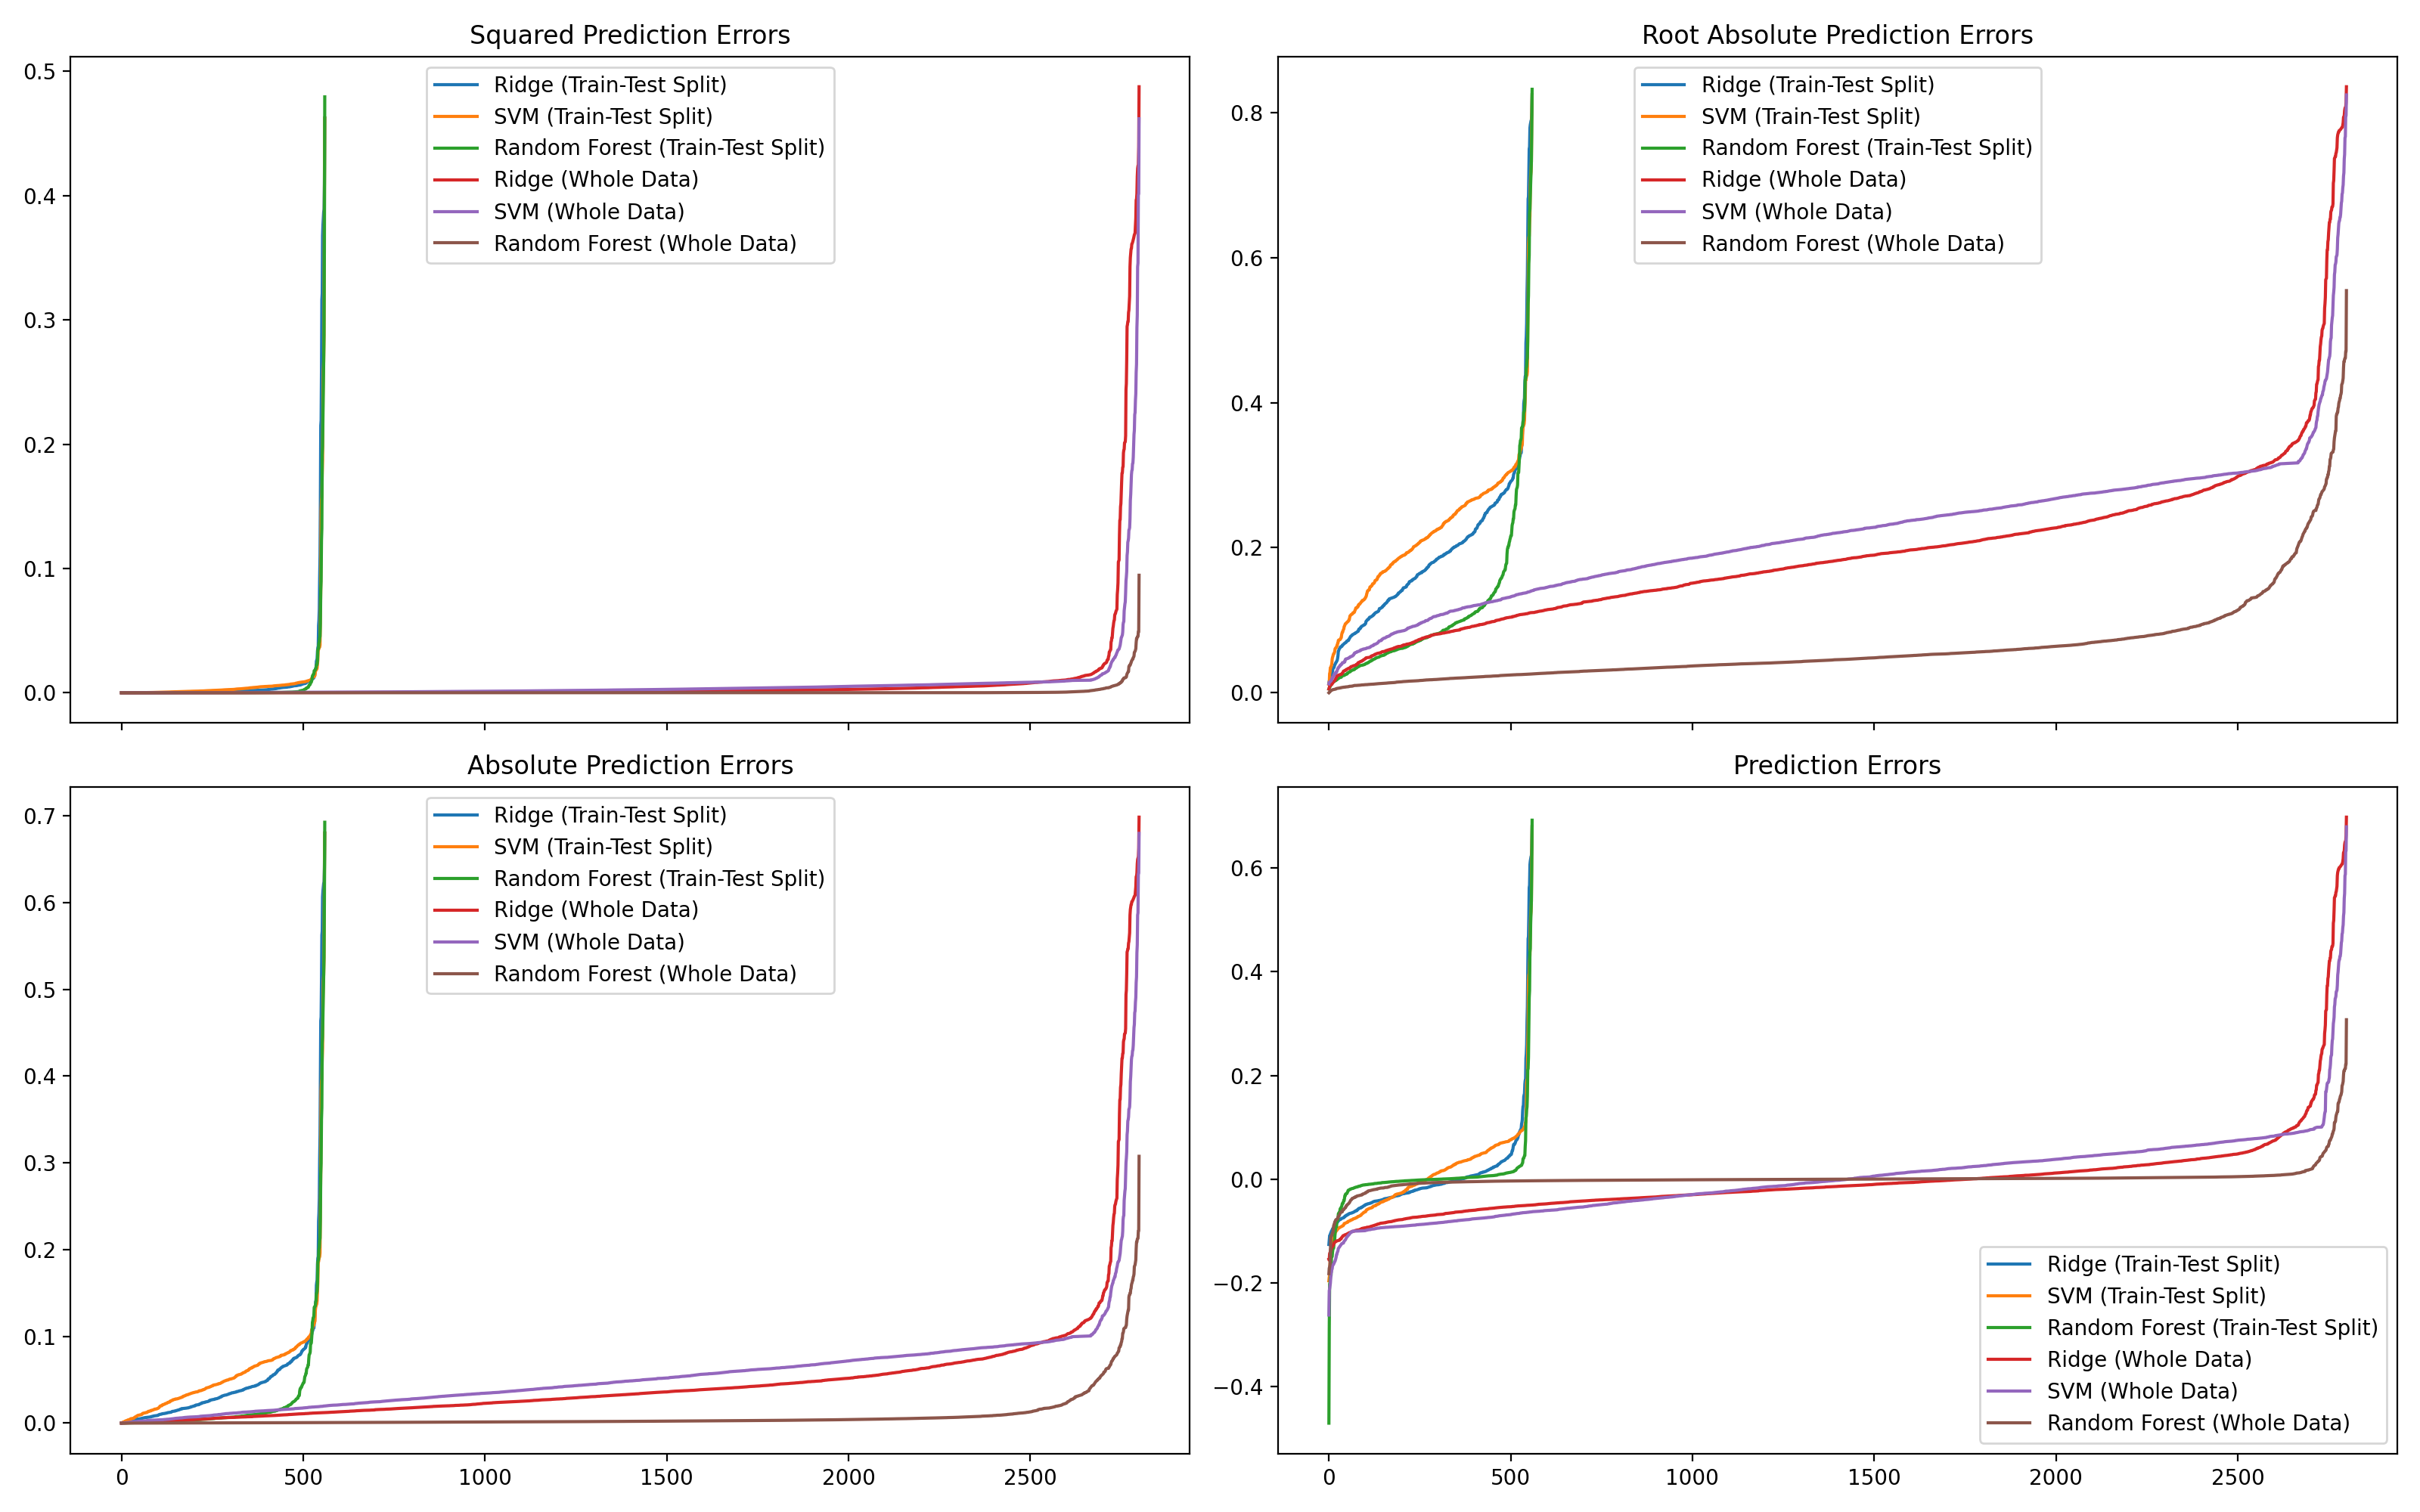

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = scaled_df

# Split the data into features and target variable
X = data.drop(['Mean Household Income', 'Income Percentile', 'Unadjusted Life Expectancy', 'Standard Error of Unadjusted Life Expectancy','Male'], axis=1)
y = data['Mean Household Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the prediction errors
        errors = y_test - y_pred
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the prediction errors
        errors = y - y_pred

    # Calculate the squared prediction errors
    squared_errors = errors ** 2

    # Calculate the root absolute prediction errors
    root_absolute_errors = np.sqrt(np.abs(errors))

    # Calculate the absolute prediction errors
    absolute_errors = np.abs(errors)

    # Visualize the squared prediction errors
    axes[0, 0].plot(sorted(squared_errors), label=name)
    axes[0, 0].set_title("Squared Prediction Errors")
    axes[0, 0].legend()

    # Visualize the root absolute prediction errors
    axes[0, 1].plot(sorted(root_absolute_errors), label=name)
    axes[0, 1].set_title("Root Absolute Prediction Errors")
    axes[0, 1].legend()

    # Visualize the absolute prediction errors
    axes[1, 0].plot(sorted(absolute_errors), label=name)
    axes[1, 0].set_title("Absolute Prediction Errors")
    axes[1, 0].legend()

    # Visualize the prediction errors
    axes[1, 1].plot(sorted(errors), label=name)
    axes[1, 1].set_title("Prediction Errors")
    axes[1, 1].legend()

plt.tight_layout()
plt.show()


As seen by the drastic spike in error for these models in both Train-Test Split and Whole Data, it is quite clear that there was overfitting. However, with limited dependent variables as well as various lurking variables, this should come as no surprise. Variables such as parent income, average spending, location, etc., were not included. This would likely allow our models to predict better on unknown data.

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = scaled_df

# Split the data into features and target variable
X = data.drop(['Mean Household Income', 'Income Percentile', 'Unadjusted Life Expectancy', 'Standard Error of Unadjusted Life Expectancy','Male'], axis=1)
y = data['Mean Household Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Ridge (Train-Test Split)       0.6277          0.0106               0.1028                   
SVM (Train-Test Split)         0.6909          0.0088               0.0937                   
Random Forest (Train-Test Split) 0.7817          0.0062               0.0787                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Ridge (Whole Data)             0.6328          0.0088               0.0938                   
SVM (Whole Data)               0.7282          0.0065               0.0807                   
Random Forest (Whole Data)     0.9741          0.0006               0.0249                   


These are the graphs of actual Mean Household Income against Ridge, SVM, and Random Forest predicted Mean Household Income. It is clear through the diagrams that Ridge and SVM did not predict well as the differences in actual and predicted Mean Household Income seemed to possess similar curvatures in portions of the graph. From the Random Forest, we see actual and predicted Mean Household Income being quite similar. However, as discussed previously, we know from R-Square and MSE that this was a result of overfitting.

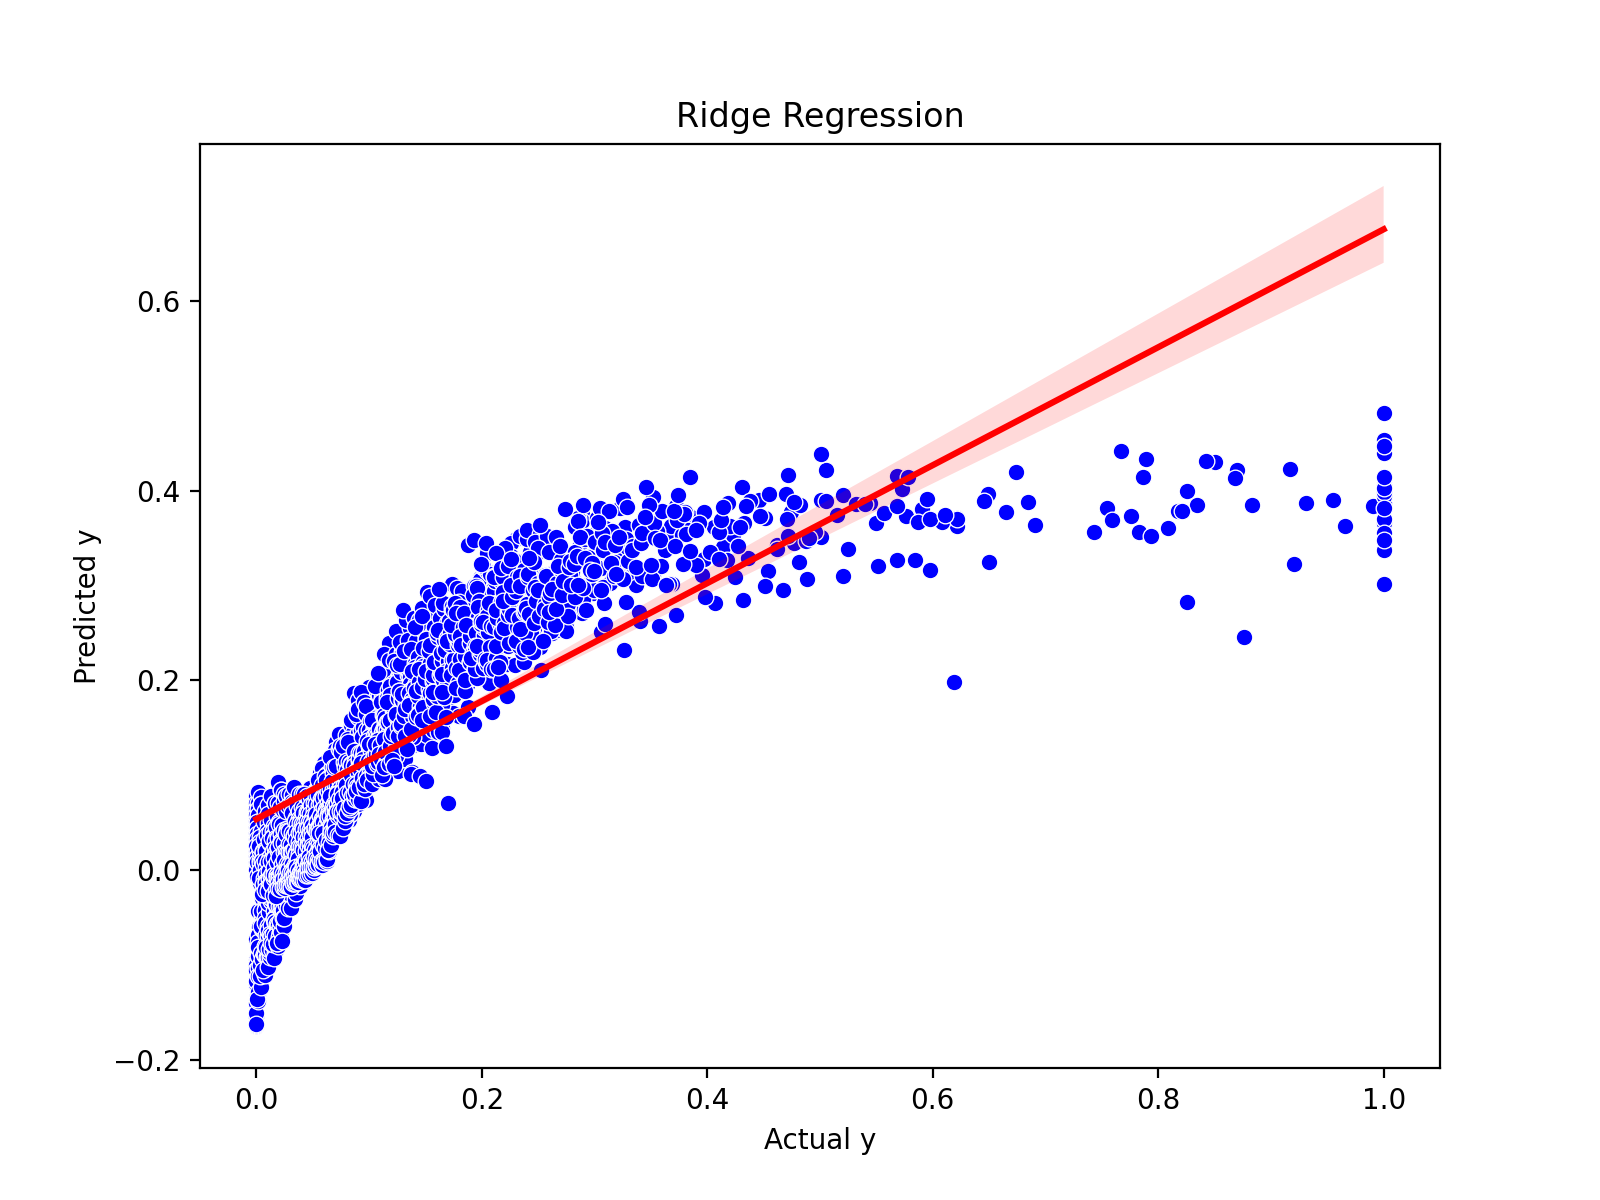

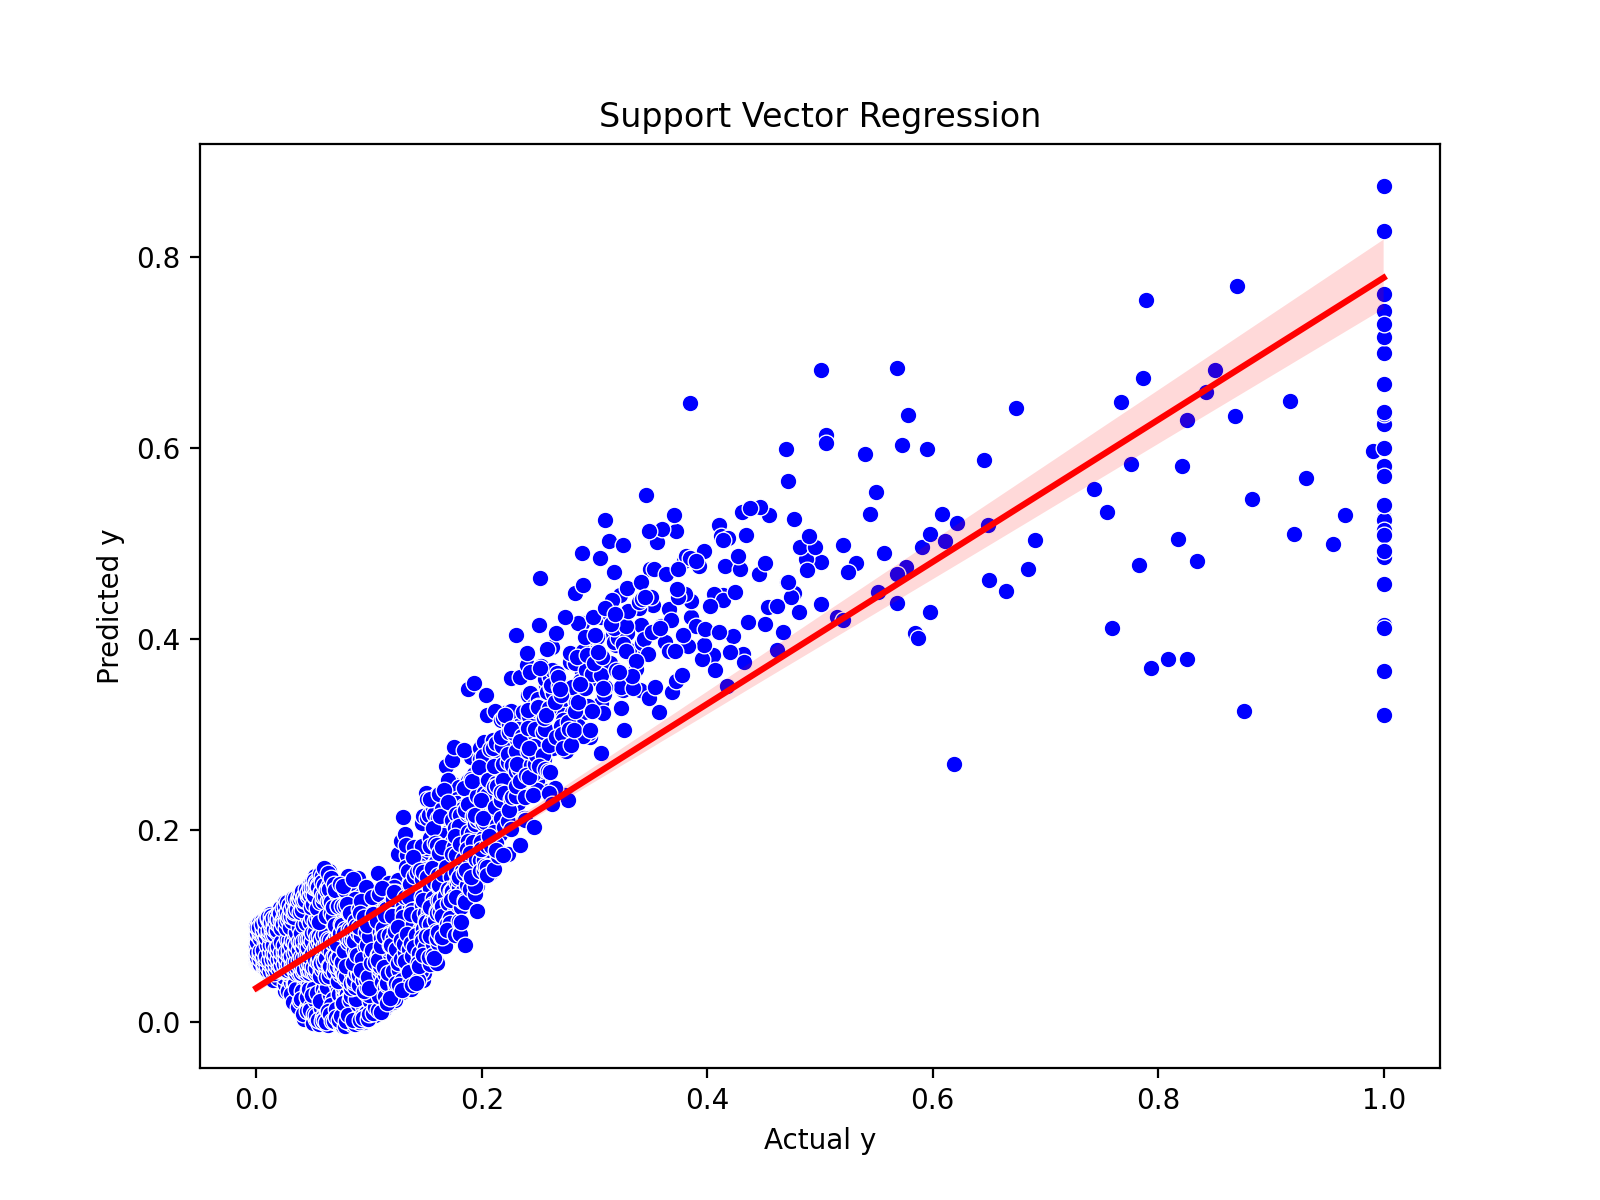

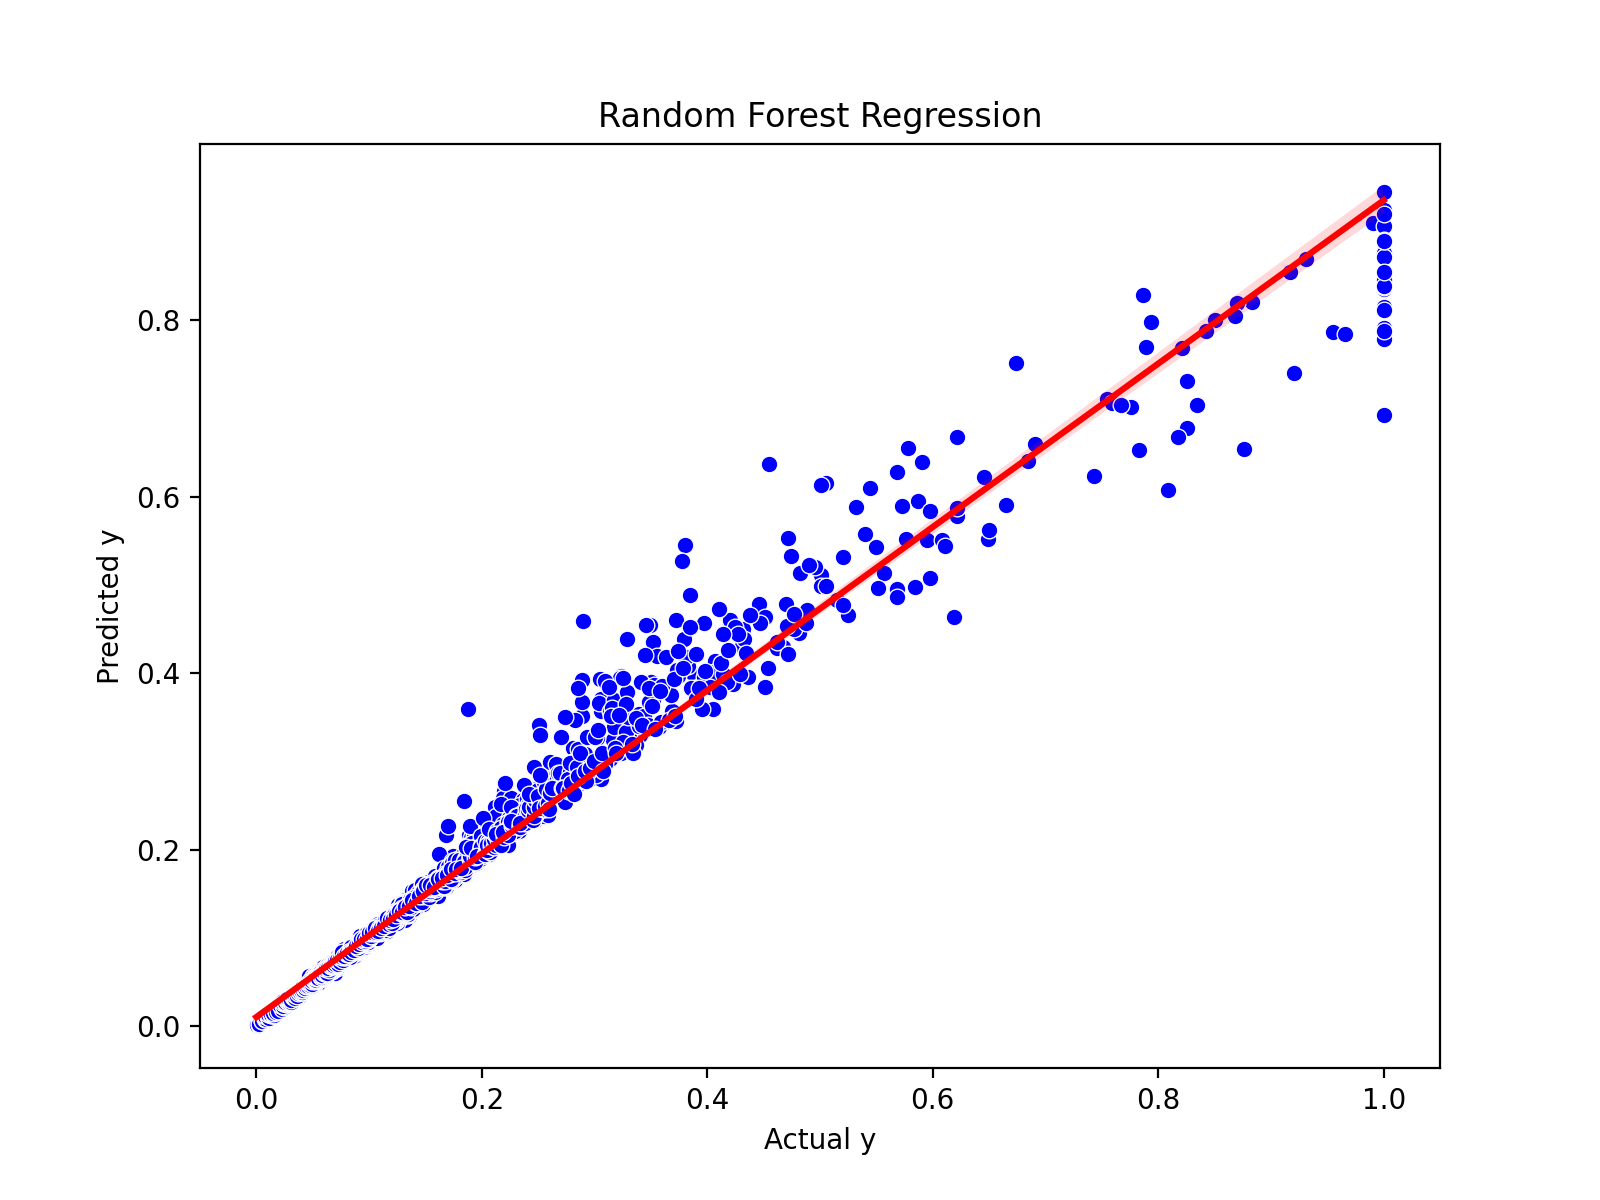

In [ ]:
from xgboost import XGBRegressor

# Load the data
data = scaled_df

# Split the data into features and target variable
X = data.drop(['Mean Household Income', 'Income Percentile', 'Unadjusted Life Expectancy', 'Standard Error of Unadjusted Life Expectancy','Male'], axis=1)
y = data['Mean Household Income']

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data for Ridge
y_pred_ridge = ridge_model.predict(X)

# Instantiate the SVR model
svm_model = SVR()

# Fit the SVR model to the entire data
svm_model.fit(X, y)

# Make predictions on the entire data for SVM
y_pred_svm = svm_model.predict(X)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model to the entire data
rf_model.fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_rf = rf_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Ridge
results_df_ridge = pd.DataFrame({'Actual': y, 'Predicted': y_pred_ridge, 'Errors': y - y_pred_ridge})

# Create a DataFrame to hold the actual y values, predicted values, and errors for SVM
results_df_svm = pd.DataFrame({'Actual': y, 'Predicted': y_pred_svm, 'Errors': y - y_pred_svm})

# Create a DataFrame to hold the actual y values, predicted values, and errors for Random Forest
results_df_rf = pd.DataFrame({'Actual': y, 'Predicted': y_pred_rf, 'Errors': y - y_pred_rf})

# Plot the actual y values against the predicted values for Ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_ridge, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_ridge, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression")

# Show the plot for Ridge
plt.show()

# Plot the actual y values against the predicted values for SVM
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_svm, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_svm, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Support Vector Regression")

# Show the plot for SVM
plt.show()

# Plot the actual y values against the predicted values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_rf, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Random Forest Regression")

# Show the plot for Random Forest
plt.show()


## Interpretation and Conclusions (10 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address an economic question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently or change their decisions with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Addressing an Economic Question:
The aforementioned regression analysis shows a strong correlation between mean household income and variables like year, gender, income percentile, year-squared life expectancy, and race-adjusted life expectancy. The outcomes also demonstrate how well different regression models perform in estimating mean household income based on these variables. The economic question being addressed here is, “What are the determining factors that impact the mean household income and how can this information be utilized to inform decision-making?” The findings indicate a favorable correlation between mean household income and race-adjusted life expectancy. In addition, the model's explanatory power was improved by including the squares of life expectancy, year, gender, and income percentile as factors, as shown by the rise in the R-squared value. This can be interpreted by decision-makers as a sign that rising life expectancy is likely to be accompanied by rising mean household income, especially when race is taken into account. This knowledge may be extremely useful to policymakers. It implies that spending on healthcare, which may raise life expectancy, may also have favorable effects on household income. Increased funding for healthcare, education, and other services that extend life expectancy may also have positive economic effects. Yet the 'Year' variable has a negative coefficient. When other factors are taken into account, this could mean that the mean household income has decreased over time. The need to comprehend the underlying causes of this decline is indicated by the fact that this might be of concern to policymakers. Additionally, the mean household income is negatively correlated with the gender variable "Female." This reflects the gender pay gap, a well-known economic problem. When creating policies to advance gender equality in the workplace, policymakers should take this into account. Finally, as expected, there is a positive correlation between income percentile and mean household income. Decision-makers can use this to analyze the income distribution and create strategies to combat income inequality. Why should the reader care about these results? Understanding the factors that influence mean household income can inform policies and interventions that aim to improve economic conditions for households. This has wider societal implications, as increasing household income can, in turn, positively affect living standards, economic growth, and societal well-being. All in all, The readers should care about these results as they can provide insights into the socioeconomic conditions and the factors affecting household incomes.
Caveats and Potential Flaws:
There are several restrictions and potential weaknesses that need to be taken into account, even though the models presented provide insightful information. First off, results may be skewed if some important variables are not included. For instance, the ability to establish causality between variables is constrained when cross-sectional data are used instead of longitudinal data. The results could also be impacted if the dataset does not cover a broad enough range of years. Multicollinearity is also a possibility, particularly in light of the potential correlation between some of the independent variables like "Race-Adjusted Life Expectancy" and "Year." The models presume a linear relationship between variables, but in practice, the relationships may not be linear, in which case the models would not be as specified as intended. The Decision Tree, Random Forest, and XGBoost models in particular may have high R-squared values due to overfitting, which causes the models to fit the dataset's noise rather than the underlying pattern, limiting their ability to generalize to new data. Last but not least, the dataset's scaling and transformations may have an impact on how the coefficients are interpreted and may not accurately reflect the scale of the original data. 


## Reproducibility (Optional, 2 points)

Describe the ways you used to keep reproducibility briefly and include your colab or github link.



For easy reproducibility, we included comments on code cells to explain the reasoning behind the code. We mainly used Deepnote to collaborate in this project. Deepnote allows for one shared environment and in-time document changes. We uploaded the final project to Alex's Github for reproducibility.
https://deepnote.com/workspace/saaketh-gunukula-adfc-cf0a4348-8e44-4f4d-aafe-4a92a6a42035/project/Econ-148-Project-5291637e-1b2c-4c8e-8972-e7b40a112896/notebook/project_template-82bd12fbb089442380f67ac0a0e2d146

https://github.com/AlexLee0/Econ148Project/blob/main/FinalProject.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5291637e-1b2c-4c8e-8972-e7b40a112896' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>